# (TR) Churn (Ayrılma) Azaltma — Davranışa Dayalı Segmentasyon + 14 Günlük A/B

**Veri dosyam (relative yol):** `./data/BankChurners.csv`  
> Relative (göreli) yol demek: Not defterini nerede açarsan aç, projenin kökünde bir `data/` klasörü olmalı ve CSV dosyasını oraya koymalısın.  
> Bu sayede projeye bakan herkes aynı yapıyla çalıştırabilir: `data/BankChurners.csv` yoksa kendi verisini o klasöre kopyalar veya notebook’taki `DATA_PATH` satırını değiştirir.

---

## Bu proje ne yapıyor? (basitçe)
Bir dükkânı düşün: bazı müşteriler gelmeyi bırakıyor. Biz de **kimlerin** uzaklaştığını, **neden** uzaklaştığını ve **nasıl geri kazanılacağını** anlamaya çalışıyoruz.

**Yaklaşım (özet):**
1. **Davranış sinyalleri:**  
   - **F (Frequency)** = ne kadar sık işlem,  
   - **M (Monetary)** = ne kadar harcama,  
   - **R (Recency proxy)** = ne zamandır pasif (burada `Months_Inactive_12_mon` üzerinden).
2. **Segmentasyon:** Bu sinyallerle düşük kullanım alanlarında odaklı **mikro-segmentler** (RFM + F/M kuantilleri) tanımlarız.
3. **A/B deneyi (14 gün):** Seçilen segmentlerde müşterilerin yarısı **test** (teklif/mesaj görür), yarısı **kontrol** (görmez).  
4. **Değerlendirme:** 14 gün sonunda **Ayrılma (churn)**, **İşlem oranı (tx rate)**, **Ortalama tutar (avg amount)** farklarına ve **%95 Güven Aralığı (CI)**’na bakarak **GO / NO-GO** kararı veririz.

---

## Churn analizi nedir?
**Churn (ayrılma)**, bir müşterinin hizmeti bırakmasıdır. Churn analizi; **kimler** ayrılıyor (profil/segment), **hangi davranışlar** ayrılmayı işaret ediyor (neden), ve **hangi aksiyonlar** ayrılmayı düşürüyor (nasıl) sorularına yanıt verir.  
Amaç: **en az çabayla en çok etkili** segmentleri bulup, **kanıta dayalı** müdahaleler tasarlamak.

---

## %95 Güven Aralığı (CI) bize neyi gösterir?
Bir segmentte **Test − Kontrol farkını** (ör. churn’da **−5 puan**) hesaplıyoruz.  
**%95 CI**, bu etkinin belirsizliğini gösterir:  
- CI **0’ın altındaysa** ve anlamlılık **p < 0.05** ise; “gerçek farkın yüksek olasılıkla sıfırın altında” olduğunu söyleriz → **etki gerçektir** (GO’ye aday).  
- CI **0’ı kesiyorsa**, farkın tesadüften gelebileceği ihtimali yüksektir → **emin değiliz** (NO-GO/Revize).

Kısaca: **farkın büyüklüğü** “etkiyi”, **CI genişliği** “belirsizliği”, **p-değeri** ise bunun **tesadüf olma olasılığını** anlatır.

---

## Net bulgularımız
**Genel churn:** **%16.07**

**En riskli mikro-segment:**  
`RFM=Low | F=Low | M=Mid-Low` → **churn ≈ %82.16**

**Diğer yüksek risk:**  
`RFM=Low | F=Low | M=Low` → **churn ≈ %25.68**

**14 günlük A/B (Test − Kontrol):**  
- `RFM=Low | F=Low | M=Mid-Low`  
  - **Churn:** **−12.22 puan** (p≈0.0021)  
  - **Tx rate:** **+2.68 puan**  
  - **Avg amount:** **+2.98**
- `RFM=Low | F=Low | M=Low`  
  - **Churn:** **−5.46 puan** (p≈0.0045)  
  - **Tx rate:** **+4.81 puan**  
  - **Avg amount:** **+0.83**

**Tahmini etki:** Test kolunda **~87 müşteri** kurtarıldı (kabaca).

**Karar:** Düşük kullanım segmentleri için **GO**. Bazı segmentlerde belirsizlik kaldığı için **NO-GO/Revize** (teklif/kanal değiştir, yeniden test).

> Not: Gerçek 14 günlük sonuç veriniz yoksa notebook sentetik (simüle) sonuç üretir; bu bölüm **demo amaçlıdır**.

---

## Nasıl çalıştırılır?
1. Proje kökünde `data/` klasörü oluşturun ve `BankChurners.csv` dosyasını **`./data/`** içine koyun.  
2. Notebook’ta `DATA_PATH = "./data/BankChurners.csv"` satırıyla çalıştırın.  
3. Çıktılar `./outputs/` ve `./reports/` altında oluşur.

---

## Kullandığımız test ve istatistikler
- **EDA (Keşif):**  
  - Kategorikler: **Ki-kare** + **Cramér’s V** (ilişki/güç)  
  - Sayısal/ordinal: **Spearman ρ** (monoton ilişki)
- **A/B farkları (14g):**  
  - **İki-oran z-testi** (churn, tx rate) — fark (yüzde puan) + **%95 CI**  
  - **Ortalama farkı (Welch approx)** (avg amount) — fark + **%95 CI**  
  - **Wilson %95 CI** (tek-kol oran CI — bar hataları için)
- **Karar kuralı:** **GO** ⇢ Churn farkı ≤ **−3.0pp** **ve** p < 0.05; aksi halde **NO-GO/Revize**.

---

## Terimler (Sözlük)
- **Churn (Ayrılma):** Müşterinin hizmeti bırakması  
- **F (Frequency):** İşlem sıklığı  
- **M (Monetary):** Harcama/ciro  
- **R (Recency proxy):** Ne zamandır pasif  
- **RFM / RFM_bin:** R+F+M toplam puanı ile **Low / Mid / High** kovaları  
- **Tx rate:** 14 günde en az bir işlem yapma oranı  
- **Avg amount:** 14 günde düşen ortalama tutar  
- **A/B test:** Test (teklif) ve Kontrol (yok) grupları karşılaştırması  
- **Lift / Impact (pp):** Yüzde puan farkı  
- **CI (%95):** Belirsizlik aralığı  
- **p-değeri:** Tesadüf olma olasılığı (küçükse daha anlamlı)


# (EN) Churn Reduction — Behavior-Based Segmentation + 14-Day A/B

**My data file (relative path):** `./data/BankChurners.csv`  
> “Relative” means: keep a `data/` folder at the project root and put the CSV there.  
> Anyone cloning the project can run it as-is; if they use a different location, they just edit `DATA_PATH` in the notebook.

---

## What is this project?
Think of a local shop: some customers stop visiting. We want to know **who** is drifting, **why**, and **how** to win them back.

**Approach (short):**
1. **Behavior signals:**  
   - **F (Frequency)** = how often,  
   - **M (Monetary)** = how much,  
   - **R (Recency proxy)** = how inactive (here via `Months_Inactive_12_mon`).
2. **Segmentation:** Define **micro-segments** (RFM + F/M quantiles), focusing on low-usage areas.
3. **A/B test (14 days):** Within selected segments, half see the offer (**test**), half don’t (**control**).  
4. **Evaluation:** After 14 days, compare **Churn**, **Tx rate**, **Avg amount** with **95% CIs** to make **GO / NO-GO** decisions.

---

## What is churn analysis?
**Churn** is when a customer stops using the service. Churn analysis answers: **who** churns (profile/segment), **which behaviors** signal risk (why), and **which actions** reduce churn (how).  
Goal: find **high-impact** segments and act with **evidence** (not guesswork).

---

## What does a 95% Confidence Interval tell us?
We compute **Test − Control** differences (e.g., churn **−5 pp**).  
The **95% CI** shows uncertainty around that effect:  
- If the CI is **entirely below 0** and **p < 0.05**, the effect is likely real → **GO candidate**.  
- If the CI **crosses 0**, the effect may be noise → **NO-GO/Revise** (change offer/channel and re-test).

In short: **effect size** = magnitude of the difference; **CI width** = uncertainty; **p-value** = chance it’s random.

---

## Key findings
**Overall churn:** **16.07%**

**Riskiest micro-segment:**  
`RFM=Low | F=Low | M=Mid-Low` → **churn ≈ 82.16%**

**Another high-risk:**  
`RFM=Low | F=Low | M=Low` → **churn ≈ 25.68%**

**14-day A/B (Test − Control):**  
- `RFM=Low | F=Low | M=Mid-Low`  
  - **Churn:** **−12.22 pp** (p≈0.0021)  
  - **Tx rate:** **+2.68 pp**  
  - **Avg amount:** **+2.98**
- `RFM=Low | F=Low | M=Low`  
  - **Churn:** **−5.46 pp** (p≈0.0045)  
  - **Tx rate:** **+4.81 pp**  
  - **Avg amount:** **+0.83**

**Estimated impact:** about **87 customers saved** on the test arm.

**Decision:** **GO** for low-usage micro-segments. Where uncertainty remains, **NO-GO/Revise** and re-test.

> Note: If there’s no real 14-day outcome data, the notebook simulates (synthetic) outcomes; that part is **for demo purposes**.

---

## How to run
1. Create `data/` at the project root and place the CSV as **`./data/BankChurners.csv`**.  
2. In the notebook, set `DATA_PATH = "./data/BankChurners.csv"` and run cells in order.  
3. Outputs appear under `./outputs/` and `./reports/`.

---

## Tests & statistics used
- **EDA:**  
  - Categoricals: **Chi-square** + **Cramér’s V** (association/strength)  
  - Numeric/ordinal: **Spearman ρ** (monotonic association)
- **A/B differences (14d):**  
  - **Two-proportion z-test** (churn, tx rate) — difference (pp) + **95% CI**  
  - **Mean difference (Welch approx)** (avg amount) — difference + **95% CI**  
  - **Wilson 95% CI** (per-arm proportion CIs for bar error bars)
- **Decision rule:** **GO** ⇢ Churn diff ≤ **−3.0 pp** and p < 0.05; otherwise **NO-GO/Revise**.

---

## Glossary
- **Churn:** Customer leaves the service  
- **F (Frequency):** How often they transact  
- **M (Monetary):** How much they spend  
- **R (Recency proxy):** How inactive they are  
- **RFM / RFM_bin:** Sum of R+F+M → **Low / Mid / High** buckets  
- **Tx rate:** ≥1 transaction within 14 days  
- **Avg amount:** Average amount within the 14-day window  
- **A/B test:** Test (offer) vs Control (no offer) comparison  
- **Lift / Impact (pp):** Percentage-point difference  
- **CI (95%):** Uncertainty band around the effect  
- **p-value:** Probability the observed effect is random


In [18]:
# TR: importlar, klasörler, stil ve yardımcı fonksiyonlar
# EN: One-time imports, folders, style and helper functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import chi2_contingency, spearmanr
from math import sqrt

# --- Paths / Klasörler ---
OUT = Path("./outputs"); OUT.mkdir(exist_ok=True)
FIG = OUT / "figs"; FIG.mkdir(parents=True, exist_ok=True)

# --- Palette & Style 
COLS = {
    "p0": "#f8f4d9",
    "p1": "#c4b05a",
    "p2": "#8f7f2a",
    "p3": "#6b5500",
    "accent": "#4a3d00",
    "gold2": "#a89654",
    "text": "#333",
    "text2": "#555",
    "line": "#ccc",
    "bg": "#f5f5f5",
}
plt.rcParams.update({
    "figure.figsize": (12, 7),
    "figure.facecolor": COLS["bg"],
    "axes.facecolor": COLS["bg"],
    "axes.edgecolor": COLS["text"],
    "axes.labelcolor": COLS["text"],
    "xtick.color": COLS["text"],
    "ytick.color": COLS["text"],
    "axes.titleweight": "bold",
    "axes.titlesize": 22,
    "axes.titlepad": 18,
    "axes.labelsize": 13
})

def ax_style(ax):
    """TR: Grid/çerçeve stili — EN: Grid/spines styling"""
    ax.grid(axis="y", linestyle="--", linewidth=1, alpha=0.35, color=COLS["line"])
    for sp in ax.spines.values():
        sp.set_color(COLS["text"])
        sp.set_linewidth(1.6)

def churn_tbl(d: pd.DataFrame, by: str, observed: bool = False) -> pd.DataFrame:
    """
    TR: Segment bazında churn (%). FutureWarning için observed parametresi açık.
    EN: Churn (%) by segment. 'observed' passed explicitly to avoid FutureWarning.
    """
    g = (d.groupby(by, observed=observed)["is_churn"]
           .agg(churn_rate="mean", n="count"))
    t = g.reset_index()
    t["churn_rate"] = (t["churn_rate"] * 100).round(2)
    return t.sort_values("churn_rate", ascending=False)

def bar_churn(t: pd.DataFrame, x: str, title: str, rot: int = 0, color: str = "p1", fname: str|None=None):
    """TR: Sade bar grafik — EN: Simple bar chart"""
    fig, ax = plt.subplots()
    ax.bar(t[x].astype(str), t["churn_rate"], color=COLS[color], edgecolor="white", linewidth=1.6)
    ax.set_title(title, color=COLS["text"])
    ax.set_xlabel(x); ax.set_ylabel("Churn Rate (%)")
    ax.tick_params(axis="x", rotation=rot)
    ax_style(ax)
    if fname:
        plt.savefig(FIG / f"{fname}.png", bbox_inches="tight", dpi=140)
    plt.show()

def qscore(s: pd.Series, q=5, high_good=True):
    """TR: Sıralı kuantil skoru — EN: Quantile score helper"""
    r = pd.qcut(s.rank(method="first"), q=q, labels=False) + 1
    return r if high_good else (q + 1 - r)


In [5]:
# TR: CSV yolu (relative). Dosyanız "projeKoku/data" içinde olmalı.
# EN: CSV path (relative). Put your CSV under "projectRoot/data".
DATA_PATH = "./data/BankChurners.csv"

import pandas as pd
df = pd.read_csv(DATA_PATH)
print("Loaded:", DATA_PATH, "rows=", len(df))

print("shape:", df.shape)
display(df.head(3))
print("\nDTypes:\n", df.dtypes)
print("\nNull counts (top):\n", df.isna().sum().sort_values(ascending=False).head(15))

Loaded: ./data/BankChurners.csv rows= 10127
shape: (10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998



DTypes:
 CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         obj

In [3]:
# TR: Naive_Bayes_* kolonlarını at 
# EN: Drop Naive_Bayes_* columns 
nb_cols = [c for c in df.columns if c.startswith("Naive_Bayes_Classifier")]
df = df.drop(columns=nb_cols, errors="ignore").copy()

# TR: Hedef (churn) alanı
# EN: Target flag
df["is_churn"] = df["Attrition_Flag"].str.contains("attrited", case=False).astype(int)

# TR: Sayısal dönüşümler
# EN: Cast numeric-like columns
num_like = [
    "Customer_Age","Dependent_count","Months_on_book","Total_Relationship_Count",
    "Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal",
    "Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio"
]
for c in num_like:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# TR: Kategorik metinleri temizle (gizli boşluk/kaçak karakter)
# EN: Clean category strings (whitespace/hidden chars)
for c in ["Income_Category","Education_Level","Marital_Status","Card_Category","Gender"]:
    if c in df.columns and df[c].dtype == "O":
        df[c] = (df[c].astype(str)
                        .str.replace(r"\s+", " ", regex=True)
                        .str.strip())

print("Cleaning done. shape:", df.shape)


Cleaning done. shape: (10127, 22)


In [4]:
# TR: Income map (ordinal proxy) + Unknown bayrağı
# EN: Income mapping + Unknown flag
inc_map = {
    "Less than $40K": 20000,
    "$40K - $60K":   50000,
    "$60K - $80K":   70000,
    "$80K - $120K": 100000,
    "$120K +":      150000,
    "Unknown":      np.nan
}
df["Income_Num"] = df["Income_Category"].map(inc_map)
df["Income_Unknown"] = (df["Income_Category"].astype(str).str.lower() == "unknown").astype(int)

# TR: Yaş grubu
# EN: Age groups
age_bins = [18, 30, 45, 60, 100]
age_labels = ["18-30","31-45","46-60","60+"]
df["age_grp"] = pd.cut(df["Customer_Age"], bins=age_bins, labels=age_labels, include_lowest=True)

# TR: Frequency & Monetary kuantilleri
# EN: Frequency & Monetary quartiles
df["freq_q"] = pd.qcut(df["Total_Trans_Ct"], 4, labels=["Low","Mid-Low","Mid-High","High"])
df["mon_q"]  = pd.qcut(df["Total_Trans_Amt"], 4, labels=["Low","Mid-Low","Mid-High","High"])

# TR: Basit RFM (R: düşük inaktivite iyi)
# EN: Simple RFM (R: fewer inactive is better)
df["R_s"] = qscore(-df["Months_Inactive_12_mon"])
df["F_s"] = qscore(df["Total_Trans_Ct"])
df["M_s"] = qscore(df["Total_Trans_Amt"])
df["RFM_sum"] = df[["R_s","F_s","M_s"]].sum(axis=1)

def rfm_bucket(v: int) -> str:
    if v <= 8:  return "Low"
    if v <= 11: return "Mid"
    return "High"

df["RFM_bin"] = df["RFM_sum"].apply(rfm_bucket)

print("Feature engineering done. shape:", df.shape)

Feature engineering done. shape: (10127, 32)


In [5]:
overall = round(df["is_churn"].mean() * 100, 2)
print(f"Overall churn: {overall}%")

# TR: Basit dağılımlar (isteğe bağlı)
# EN: Simple distributions (optional)
print("\nfreq_q counts:\n", df["freq_q"].value_counts(dropna=False))
print("\nRFM_bin counts:\n", df["RFM_bin"].value_counts(dropna=False))

Overall churn: 16.07%

freq_q counts:
 freq_q
Mid-High    2662
Low         2611
Mid-Low     2512
High        2342
Name: count, dtype: int64

RFM_bin counts:
 RFM_bin
Low     4523
Mid     2885
High    2719
Name: count, dtype: int64


In [6]:
# TR: Analiz tabloları 
# EN: Analysis tables 
tables = {}
for col in ["freq_q","mon_q","RFM_bin","Income_Category","Gender","Card_Category","age_grp"]:
    t = churn_tbl(df, col, observed=False)
    tables[col] = t
    t.to_csv(OUT / f"churn_by_{col}.csv", index=False)
    print(f"saved: outputs/churn_by_{col}.csv")

# TR: Hızlı gösterim
# EN: Quick display
display(tables["freq_q"])
display(tables["RFM_bin"])

saved: outputs/churn_by_freq_q.csv
saved: outputs/churn_by_mon_q.csv
saved: outputs/churn_by_RFM_bin.csv
saved: outputs/churn_by_Income_Category.csv
saved: outputs/churn_by_Gender.csv
saved: outputs/churn_by_Card_Category.csv
saved: outputs/churn_by_age_grp.csv


,freq_q,churn_rate,n
0,Low,37.07,2611
1,Mid-Low,20.46,2512
2,Mid-High,4.47,2662
3,High,1.11,2342


,RFM_bin,churn_rate,n
1,Low,28.54,4523
2,Mid,7.07,2885
0,High,4.85,2719


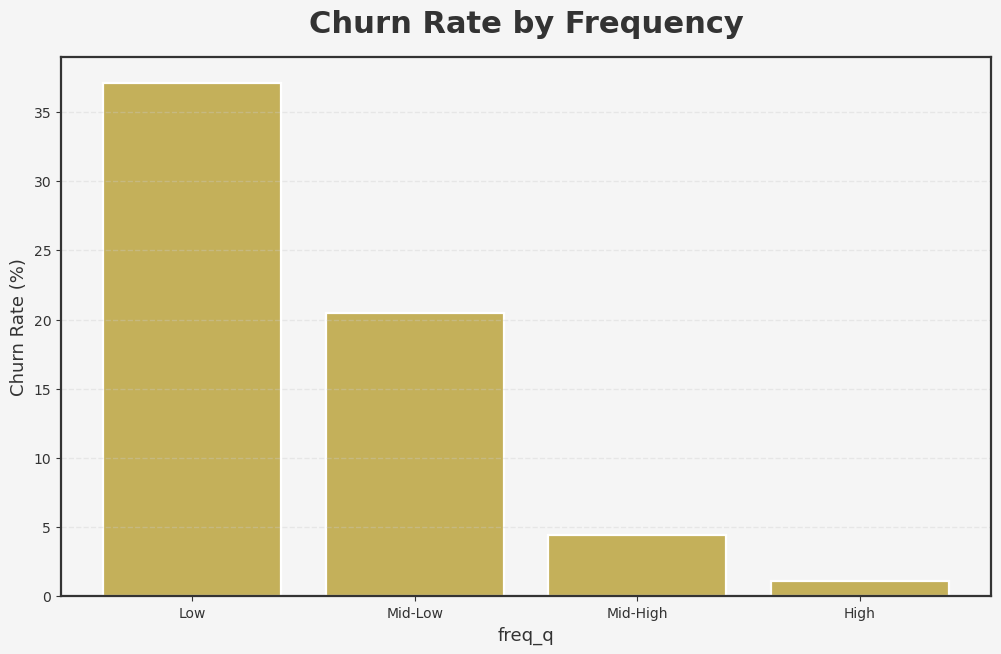

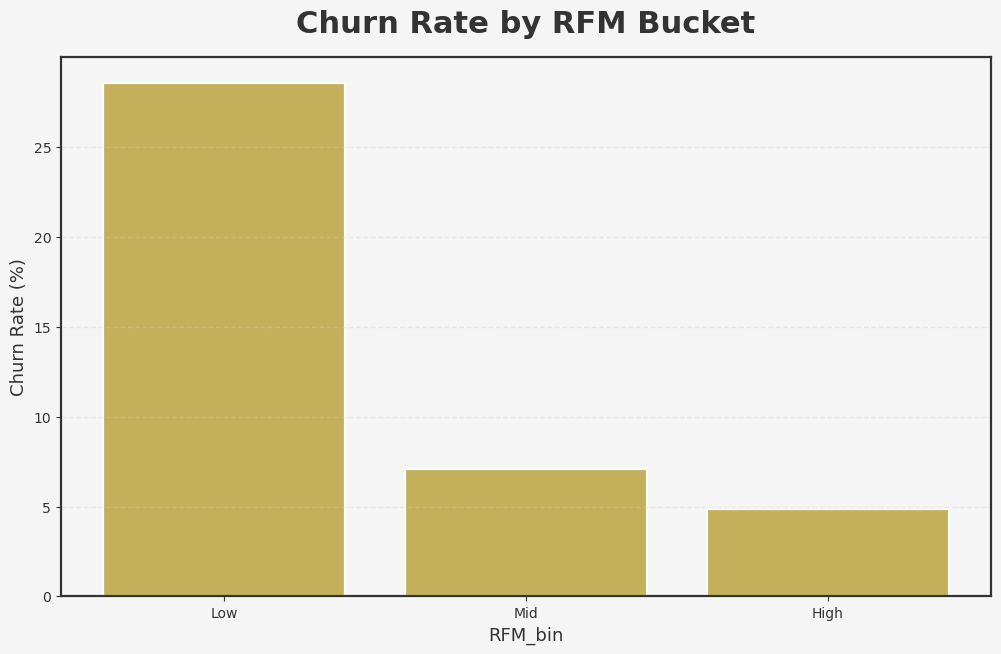

saved figs -> outputs/figs/freq_q.png & RFM_bin.png


In [7]:
# TR: İki temel grafik
# EN: Two core charts

bar_churn(tables["freq_q"], "freq_q", "Churn Rate by Frequency", rot=0, color="p1", fname="freq_q")
bar_churn(tables["RFM_bin"], "RFM_bin", "Churn Rate by RFM Bucket", rot=0, color="p1", fname="RFM_bin")
print("saved figs -> outputs/figs/freq_q.png & RFM_bin.png")

In [8]:
# TR: Kategorikler için Ki-kare + Cramér’s V, sayısallar için Spearman
# EN: Chi-square + Cramér’s V for categoricals; Spearman for numeric

def chi_cramers_v(d: pd.DataFrame, cat: str, target: str = "is_churn"):
    ct = pd.crosstab(d[cat], d[target])
    chi2, p, dof, exp = chi2_contingency(ct)
    n = ct.values.sum()
    phi2 = chi2 / n
    r, k = ct.shape
    # bias correction
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    v = np.sqrt(phi2_corr / max(1e-12, min(k_corr-1, r_corr-1)))
    return {"chi2": chi2, "p_value": p, "cramers_v": v, "n": int(n)}

def spear(d: pd.DataFrame, col: str, target: str = "is_churn"):
    x = d[col]; y = d[target]
    m = x.notna() & y.notna()
    rho, p = spearmanr(x[m], y[m])
    return {"rho": float(rho), "p_value": float(p), "n": int(m.sum())}

tests_cat, tests_num = {}, {}

for c in ["freq_q","mon_q","RFM_bin","Income_Category","Gender","Card_Category","age_grp"]:
    tests_cat[c] = chi_cramers_v(df, c)

for c in ["Total_Trans_Ct","Total_Trans_Amt","Months_on_book","Customer_Age","Income_Num"]:
    if c in df.columns:
        tests_num[c] = spear(df, c)

cat_df = (pd.DataFrame.from_dict(tests_cat, orient="index")
            .reset_index().rename(columns={"index":"feature"}))
num_df = (pd.DataFrame.from_dict(tests_num, orient="index")
            .reset_index().rename(columns={"index":"feature"}))

print("Categoricals (Chi-square / Cramér’s V):")
display(cat_df.sort_values("p_value"))
print("\nNumeric/Ordinal (Spearman):")
display(num_df.sort_values("p_value"))

cat_df.to_csv(OUT / "stats_categorical.csv", index=False)
num_df.to_csv(OUT / "stats_numeric.csv", index=False)

Categoricals (Chi-square / Cramér’s V):


,feature,chi2,p_value,cramers_v,n
0,freq_q,1544.435560,0.000000e+00,0.390161,10127
2,RFM_bin,948.698144,9.835934e-207,0.305764,10127
1,mon_q,851.021228,3.719700e-184,0.289391,10127
4,Gender,13.865614,1.963585e-04,0.035645,10127
3,Income_Category,12.832259,2.500243e-02,0.027811,10127
6,age_grp,5.362144,1.471204e-01,0.015272,10127
5,Card_Category,2.234227,5.252383e-01,0.000000,10127



Numeric/Ordinal (Spearman):


,feature,rho,p_value,n
0,Total_Trans_Ct,-0.376115,0.000000e+00,10127
1,Total_Trans_Amt,-0.223782,3.915150e-115,10127
3,Customer_Age,0.017508,7.809840e-02,10127
4,Income_Num,-0.016931,1.079568e-01,9015
2,Months_on_book,0.015300,1.236719e-01,10127


In [9]:
def prio(d: pd.DataFrame, by: str, overall_rate: float) -> pd.DataFrame:
    t = churn_tbl(d, by, observed=False)
    t["reach"] = t["n"] / len(d)
    t["impact_pp"] = (t["churn_rate"] - overall_rate).round(2)
    t["priority"] = (t["reach"] * t["impact_pp"]).round(4)
    t.insert(0, "feature", by)
    return t[["feature", by, "n", "reach", "churn_rate", "impact_pp", "priority"]]

frames = [prio(df, "RFM_bin", overall), prio(df, "freq_q", overall), prio(df, "mon_q", overall)]
priority_matrix = pd.concat(frames, ignore_index=True).sort_values("priority", ascending=False)
display(priority_matrix)
priority_matrix.to_csv(OUT / "priority_matrix.csv", index=False)
print("saved: outputs/priority_matrix.csv")

,feature,RFM_bin,n,reach,churn_rate,impact_pp,priority,freq_q,mon_q
0,RFM_bin,Low,4523,0.446628,28.54,12.47,5.5694,NaN,NaN
3,freq_q,NaN,2611,0.257826,37.07,21.00,5.4143,Low,NaN
7,mon_q,NaN,2532,0.250025,27.53,11.46,2.8653,NaN,Mid-Low
8,mon_q,NaN,2532,0.250025,24.41,8.34,2.0852,NaN,Low
4,freq_q,NaN,2512,0.248050,20.46,4.39,1.0889,Mid-Low,NaN
9,mon_q,NaN,2529,0.249728,11.47,-4.60,-1.1488,NaN,High
1,RFM_bin,Mid,2885,0.284882,7.07,-9.00,-2.5639,NaN,NaN
2,RFM_bin,High,2719,0.268490,4.85,-11.22,-3.0125,NaN,NaN
5,freq_q,NaN,2662,0.262862,4.47,-11.60,-3.0492,Mid-High,NaN
6,freq_q,NaN,2342,0.231263,1.11,-14.96,-3.4597,High,NaN


saved: outputs/priority_matrix.csv


,tenure_coh,churn_rate,n,retention_%
0,0–5m,NaN,0,NaN
1,6–11m,NaN,0,NaN
2,12–17m,15.04,246,84.959350
3,18–23m,14.81,601,85.191348
4,24–29m,15.51,1373,84.486526
5,30–35m,16.27,4045,83.733004
6,36–41m,16.18,1947,83.821263
7,42–47m,16.19,1260,83.809524
8,48–53m,17.65,510,82.352941
9,54–59m,14.48,145,85.517241


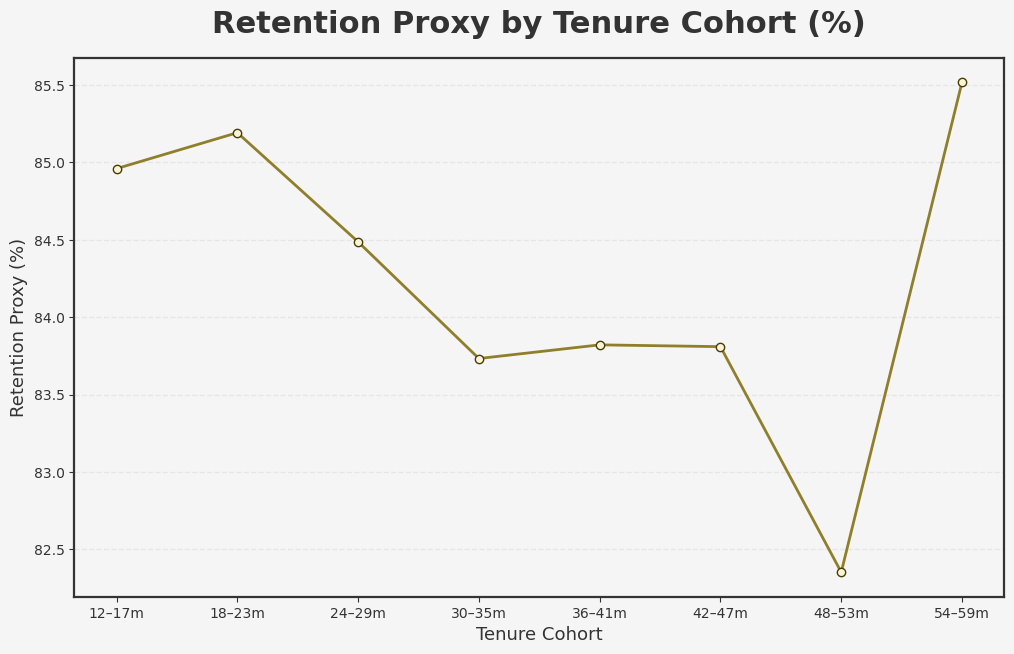

In [10]:
# TR: Ay bazlı kıdem kohortları (6 aylık), retention proxy
# EN: 6-month tenure cohorts, retention proxy

mx = int(df["Months_on_book"].max())
bins = list(range(0, mx + 7, 6))
labs = [f"{bins[i]}–{bins[i+1]-1}m" for i in range(len(bins)-1)]
df["tenure_coh"] = pd.cut(df["Months_on_book"], bins=bins, labels=labs, include_lowest=True)

coh = (df.groupby("tenure_coh", observed=False)["is_churn"]
         .agg(churn_rate="mean", n="count").reset_index())
coh["retention_%"] = (1 - coh["churn_rate"]) * 100
coh["churn_rate"]  = (coh["churn_rate"] * 100).round(2)

display(coh)
coh.to_csv(OUT / "tenure_cohort_retention_proxy.csv", index=False)

# Plot
fig, ax = plt.subplots()
ax.plot(coh["tenure_coh"].astype(str), coh["retention_%"], marker="o",
        markerfacecolor=COLS["p0"], markeredgecolor=COLS["accent"], linewidth=2, color=COLS["p2"])
ax.set_title("Retention Proxy by Tenure Cohort (%)", color=COLS["text"])
ax.set_xlabel("Tenure Cohort"); ax.set_ylabel("Retention Proxy (%)")
ax_style(ax); plt.xticks(rotation=0)
plt.savefig(FIG / "retention_proxy_by_tenure.png", bbox_inches="tight", dpi=140)
plt.show()

In [11]:
# TR: İşe odaklı kısa bulgular; dosyaya da yaz
# EN: Business-focused short insights; also write to file

lines = [
"EN — Key Insights:",
f"- Overall churn is {overall}%. Usage intensity dominates risk: Frequency & RFM buckets show strongest separation.",
"- Income/Gender show weaker aggregate effects; use only in combination with activity signals.",
"- Priority (impact × reach): RFM=Low, Freq=Low, Monetary=Low/Mid-Low are the top targets.",
"",
"TR — Öne Çıkan İçgörüler:",
f"- Genel churn {overall}% . Riskin ana sürücüsü kullanım yoğunluğu: Frekans ve RFM kovaları en güçlü ayrımı veriyor.",
"- Gelir/Cinsiyet tek başına zayıf; aktivite sinyalleriyle birlikte düşünülmeli.",
"- Öncelik (etki × kapsama): RFM=Low, Freq=Low, Monetary=Low/Mid-Low ilk hedefler.",
]
text = "\n".join(lines)
print(text)

(Path("./reports")).mkdir(exist_ok=True)
(Path("./reports/Short_Insights.txt")).write_text(text, encoding="utf-8")
print("\nSaved -> reports/Short_Insights.txt")

EN — Key Insights:
- Overall churn is 16.07%. Usage intensity dominates risk: Frequency & RFM buckets show strongest separation.
- Income/Gender show weaker aggregate effects; use only in combination with activity signals.
- Priority (impact × reach): RFM=Low, Freq=Low, Monetary=Low/Mid-Low are the top targets.

TR — Öne Çıkan İçgörüler:
- Genel churn 16.07% . Riskin ana sürücüsü kullanım yoğunluğu: Frekans ve RFM kovaları en güçlü ayrımı veriyor.
- Gelir/Cinsiyet tek başına zayıf; aktivite sinyalleriyle birlikte düşünülmeli.
- Öncelik (etki × kapsama): RFM=Low, Freq=Low, Monetary=Low/Mid-Low ilk hedefler.

Saved -> reports/Short_Insights.txt


In [12]:
# TR: En güçlü sürücüler — EN: Top drivers
overall = round(df["is_churn"].mean()*100, 2)
print(f"Overall churn: {overall}%")

# (Önceden hesaplanan tablolardan faydalanıyoruz; gerekirse yeniden üret)
t_freq = churn_tbl(df, "freq_q", observed=False)
t_mon  = churn_tbl(df, "mon_q",  observed=False)
t_rfm  = churn_tbl(df, "RFM_bin",observed=False)

print("\nTop signals:")
print("- freq_q lift:", (t_freq.set_index("freq_q")["churn_rate"] - overall).to_dict())
print("- mon_q  lift:", (t_mon.set_index("mon_q")["churn_rate"]  - overall).to_dict())
print("- RFM_bin lift:", (t_rfm.set_index("RFM_bin")["churn_rate"] - overall).to_dict())

Overall churn: 16.07%

Top signals:
- freq_q lift: {'Low': 21.0, 'Mid-Low': 4.390000000000001, 'Mid-High': -11.600000000000001, 'High': -14.96}
- mon_q  lift: {'Mid-Low': 11.46, 'Low': 8.34, 'High': -4.6, 'Mid-High': -15.200000000000001}
- RFM_bin lift: {'Low': 12.469999999999999, 'Mid': -9.0, 'High': -11.22}


Saved -> outputs\microsegment_priority.csv


,RFM_bin,freq_q,mon_q,churn_rate,n,reach,impact_pp,priority
17,Low,Low,Mid-Low,82.16,510,0.050360,66.09,3.3283
16,Low,Low,Low,25.68,2064,0.203812,9.61,1.9586
21,Low,Mid-Low,Mid-Low,27.71,895,0.088378,11.64,1.0287
20,Low,Mid-Low,Low,18.76,421,0.041572,2.69,0.1118
33,Mid,Low,Mid-Low,50.00,22,0.002172,33.93,0.0737
36,Mid,Mid-Low,Low,18.92,37,0.003654,2.85,0.0104
32,Mid,Low,Low,28.57,7,0.000691,12.50,0.0086
37,Mid,Mid-Low,Mid-Low,4.43,406,0.040091,-11.64,-0.4667


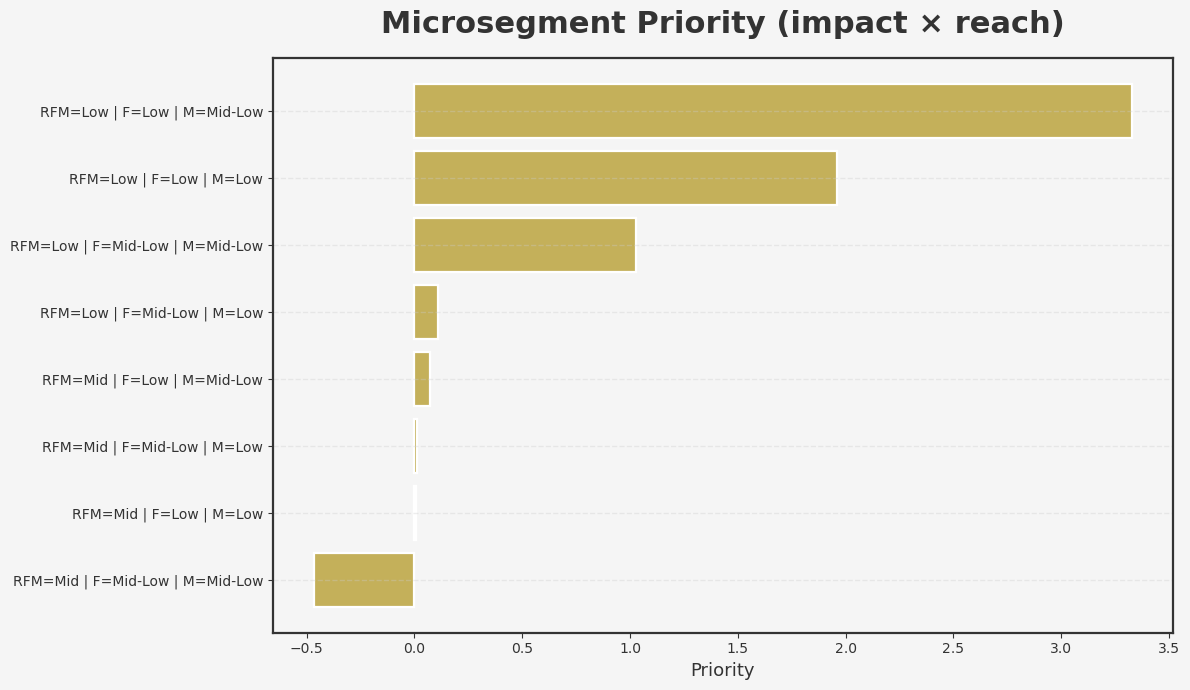

In [13]:
# 1) Mikro-segment tablosu
g = (df.groupby(["RFM_bin","freq_q","mon_q"], observed=False)["is_churn"]
       .agg(churn_rate="mean", n="count")
       .reset_index())
g["churn_rate"] = (g["churn_rate"]*100).round(2)
g["reach"] = g["n"] / len(df)
g["impact_pp"] = (g["churn_rate"] - overall).round(2)
g["priority"] = (g["reach"] * g["impact_pp"]).round(4)

# 2) İş-odaklı filtre (Low/Mid-Low odak)
filt = (
    (g["RFM_bin"].isin(["Low","Mid"])) &
    (g["freq_q"].isin(["Low","Mid-Low"])) &
    (g["mon_q"].isin(["Low","Mid-Low"]))
)
ms = g[filt].sort_values(["priority","impact_pp","reach"], ascending=False)

# 3) Kaydet + ön izleme
out_fp = Path("./outputs/microsegment_priority.csv")
ms.to_csv(out_fp, index=False)
print("Saved ->", out_fp)
display(ms.head(10))

# 4) İlk 10'u çiz
top = ms.head(10).copy()
top["label"] = (
    "RFM=" + top["RFM_bin"].astype(str) + " | F=" + top["freq_q"].astype(str) + " | M=" + top["mon_q"].astype(str)
)
fig, ax = plt.subplots()
ax.barh(top["label"], top["priority"], color=COLS["p1"], edgecolor="white", linewidth=1.6)
ax.set_title("Microsegment Priority (impact × reach)", color=COLS["text"])
ax.set_xlabel("Priority"); ax.set_ylabel("")
ax.invert_yaxis(); ax_style(ax)
plt.tight_layout(); plt.show()


In [14]:
# TR: İlk N mikrosegment için senaryo hesapla
# EN: Scenario sizing for top N microsegments
N = 10
sc_rows = []
for _, r in ms.head(N).iterrows():
    n, cr = int(r["n"]), r["churn_rate"]/100.0
    for u in [0.10, 0.15, 0.20]:
        saved = n * cr * u
        sc_rows.append({
            "RFM_bin": r["RFM_bin"], "freq_q": r["freq_q"], "mon_q": r["mon_q"],
            "n": n, "churn_rate_%": round(cr*100,2),
            "uplift_rel_%": int(u*100),
            "expected_saved_users": int(round(saved))
        })
sc = pd.DataFrame(sc_rows).sort_values(["expected_saved_users","uplift_rel_%"], ascending=False)
sc_fp = Path("./outputs/uplift_scenarios_microsegments.csv")
sc.to_csv(sc_fp, index=False)
print("Saved ->", sc_fp)
display(sc.head(12))

Saved -> outputs\uplift_scenarios_microsegments.csv


,RFM_bin,freq_q,mon_q,n,churn_rate_%,uplift_rel_%,expected_saved_users
5,Low,Low,Low,2064,25.68,20,106
2,Low,Low,Mid-Low,510,82.16,20,84
4,Low,Low,Low,2064,25.68,15,80
1,Low,Low,Mid-Low,510,82.16,15,63
3,Low,Low,Low,2064,25.68,10,53
8,Low,Mid-Low,Mid-Low,895,27.71,20,50
0,Low,Low,Mid-Low,510,82.16,10,42
7,Low,Mid-Low,Mid-Low,895,27.71,15,37
6,Low,Mid-Low,Mid-Low,895,27.71,10,25
11,Low,Mid-Low,Low,421,18.76,20,16


In [15]:
# TR: Kural tabanlı risk skoru — EN: Simple rule-based risk score
df["risk_score"] = 0
df.loc[df["RFM_bin"].eq("Low"), "risk_score"] += 2
df.loc[df["freq_q"].isin(["Low","Mid-Low"]), "risk_score"] += 1
df.loc[df["mon_q"].isin(["Low","Mid-Low"]),  "risk_score"] += 1

# Eşik (iş mantığı): skor >=3 at-risk
df["is_at_risk"] = (df["risk_score"] >= 3).astype(int)

risk_tab = (df.groupby("risk_score", observed=False)["is_churn"]
              .agg(churn_rate="mean", n="count")
              .reset_index())
risk_tab["churn_rate"] = (risk_tab["churn_rate"]*100).round(2)
display(risk_tab.sort_values("risk_score"))

print("At-risk share:", round(df["is_at_risk"].mean()*100,2), "%")
print("At-risk churn:", round(df.loc[df["is_at_risk"]==1,"is_churn"].mean()*100,2), "%")

,risk_score,churn_rate,n
0,0,3.50,4116
1,1,15.16,1016
2,2,5.78,658
3,3,3.36,447
4,4,32.80,3890


At-risk share: 42.83 %
At-risk churn: 29.77 %


In [16]:
from pathlib import Path
rows = [
    {"segment":"RFM=Low", "why":"High lift × big reach", 
     "action":"Re-activation: fee waiver + 2x points (next 3 tx, 14d)",
     "channel":"Push + Email",
     "kpi":"Churn reduction (pp) vs control"},
    {"segment":"F=Low", "why":"Very high lift", 
     "action":"Jumpstart: bonus 500 pts on first 2 tx ≥ $10",
     "channel":"Push + In-app banner",
     "kpi":"Tx rate in 14d"},
    {"segment":"M=Low/Mid-Low", "why":"Monetary deficit",
     "action":"Spend accel: 5% cashback (cap $10, 14d)",
     "channel":"Email + SMS",
     "kpi":"Avg amount vs control"}
]
quick = pd.DataFrame(rows)
display(quick)

Path("./reports").mkdir(exist_ok=True)
md = [
"# Quick Wins (TR/EN)",
"**EN**: Prioritize re-activation for RFM Low and usage jumpstart for Low Frequency; use capped cashback for Monetary deficits.",
"**TR**: Öncelik RFM Low re-aktivasyon ve Low Frequency için aktivite başlatma; Monetary açığı için üst limitli cashback.",
"",
quick.to_markdown(index=False)
]
Path("./reports/Quick_Wins.md").write_text("\n\n".join(md), encoding="utf-8")
print("Saved -> reports/Quick_Wins.md")

,segment,why,action,channel,kpi
0,RFM=Low,High lift × big reach,Re-activation: fee waiver + 2x points (next 3 ...,Push + Email,Churn reduction (pp) vs control
1,F=Low,Very high lift,Jumpstart: bonus 500 pts on first 2 tx ≥ $10,Push + In-app banner,Tx rate in 14d
2,M=Low/Mid-Low,Monetary deficit,"Spend accel: 5% cashback (cap $10, 14d)",Email + SMS,Avg amount vs control


Saved -> reports/Quick_Wins.md


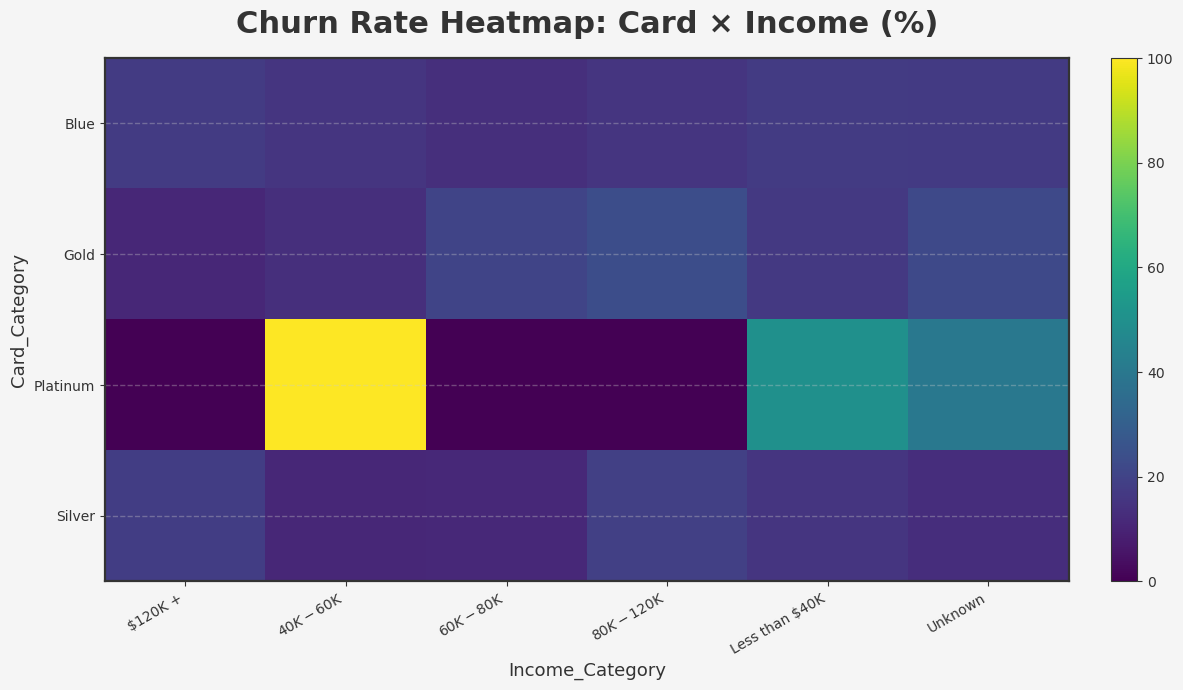

In [17]:
# Pivot
pv = (df.groupby(["Card_Category","Income_Category"], observed=False)["is_churn"]
        .mean().mul(100).unstack(fill_value=np.nan))

# Plot (matplotlib imshow — stil/palet uyumlu)
fig, ax = plt.subplots()
im = ax.imshow(pv.values, aspect="auto")
ax.set_title("Churn Rate Heatmap: Card × Income (%)", color=COLS["text"])
ax.set_xlabel("Income_Category"); ax.set_ylabel("Card_Category")
ax.set_xticks(range(len(pv.columns))); ax.set_xticklabels(pv.columns, rotation=30, ha="right")
ax.set_yticks(range(len(pv.index))); ax.set_yticklabels(pv.index)
cbar = plt.colorbar(im, fraction=0.046, pad=0.04); ax_style(ax)
plt.tight_layout()
plt.savefig(Path("./outputs/figs/heatmap_card_income.png"), bbox_inches="tight", dpi=140)
plt.show()

In [20]:
# 1) Mikro-segment tablosu (RFM × F × M)
g = (df.groupby(["RFM_bin","freq_q","mon_q"], observed=False)["is_churn"]
       .agg(churn_rate="mean", n="count", k="sum")
       .reset_index())
g["churn_rate"] = (g["churn_rate"]*100).round(2)

# 2) Wilson güven aralığı (95%)
def wilson_ci(k, n, z=1.96):
    if n == 0: 
        return (np.nan, np.nan)
    p = k / n
    denom = 1 + z**2/n
    centre = (p + z**2/(2*n)) / denom
    margin = (z * sqrt((p*(1-p) + z**2/(4*n)) / n)) / denom
    return (centre - margin, centre + margin)

# 3) İlk 10 (öncelik) için CI ve tablo
overall = round(df["is_churn"].mean()*100, 2)
g["reach"] = g["n"] / len(df)
g["impact_pp"] = (g["churn_rate"] - overall).round(2)
g["priority"] = (g["reach"] * g["impact_pp"]).round(4)

topN = (g.sort_values(["priority","impact_pp","reach"], ascending=False)
          .head(10)
          .copy())

ci_low, ci_high = [], []
for _, r in topN.iterrows():
    lo, hi = wilson_ci(r["k"], r["n"])
    ci_low.append(round(lo*100,2))
    ci_high.append(round(hi*100,2))
topN["ci_low_%"] = ci_low
topN["ci_high_%"] = ci_high

cols = ["RFM_bin","freq_q","mon_q","n","k","churn_rate","ci_low_%","ci_high_%","reach","impact_pp","priority"]
display(topN[cols])

topN.to_csv(Path("./outputs/microsegment_topN_ci.csv"), index=False)
print("Saved -> outputs/microsegment_topN_ci.csv")

,RFM_bin,freq_q,mon_q,n,k,churn_rate,ci_low_%,ci_high_%,reach,impact_pp,priority
17,Low,Low,Mid-Low,510,419,82.16,78.60,85.24,0.050360,66.09,3.3283
16,Low,Low,Low,2064,530,25.68,23.84,27.61,0.203812,9.61,1.9586
21,Low,Mid-Low,Mid-Low,895,248,27.71,24.88,30.73,0.088378,11.64,1.0287
39,Mid,Mid-Low,High,152,100,65.79,57.94,72.86,0.015009,49.72,0.7463
7,High,Mid-Low,High,49,30,61.22,47.25,73.57,0.004839,45.15,0.2185
11,High,Mid-High,High,400,79,19.75,16.14,23.93,0.039498,3.68,0.1454
20,Low,Mid-Low,Low,421,79,18.76,15.32,22.77,0.041572,2.69,0.1118
33,Mid,Low,Mid-Low,22,11,50.00,30.72,69.28,0.002172,33.93,0.0737
23,Low,Mid-Low,High,23,11,47.83,29.24,67.04,0.002271,31.76,0.0721
35,Mid,Low,High,5,5,100.00,56.55,100.00,0.000494,83.93,0.0414


Saved -> outputs/microsegment_topN_ci.csv


In [21]:
# TR: En riskli 3 mikro-segment için müşteri listesi — EN: Customer watchlists for top-3 micro-segments

# 1) top3 seçelim (priority sıralı)
top3 = (g.sort_values(["priority","impact_pp","reach"], ascending=False)
          .head(3)[["RFM_bin","freq_q","mon_q"]].to_records(index=False))

cols = ["CLIENTNUM","is_churn","RFM_bin","freq_q","mon_q","Months_Inactive_12_mon",
        "Total_Trans_Ct","Total_Trans_Amt","Credit_Limit","age_grp","Income_Category","Gender"]

watch_dir = Path("./outputs/watchlists"); watch_dir.mkdir(parents=True, exist_ok=True)

for (rfm,fq,mq) in top3:
    mask = (df["RFM_bin"].eq(rfm) & df["freq_q"].eq(fq) & df["mon_q"].eq(mq))
    sub = df.loc[mask, cols].copy()
    fn = f"watchlist_RFM-{rfm}_F-{fq}_M-{mq}.csv".replace(" ","")
    sub.to_csv(watch_dir / fn, index=False)
    print("Saved ->", watch_dir / fn, "| rows:", len(sub))

# Özet görünüm (her biri kaç kişi ve churn %)
for (rfm,fq,mq) in top3:
    m = (df["RFM_bin"].eq(rfm) & df["freq_q"].eq(fq) & df["mon_q"].eq(mq))
    n = int(m.sum())
    cr = df.loc[m,"is_churn"].mean()*100
    print(f"{(rfm,fq,mq)} -> n={n}, churn={cr:.2f}%")

Saved -> outputs\watchlists\watchlist_RFM-Low_F-Low_M-Mid-Low.csv | rows: 510
Saved -> outputs\watchlists\watchlist_RFM-Low_F-Low_M-Low.csv | rows: 2064
Saved -> outputs\watchlists\watchlist_RFM-Low_F-Mid-Low_M-Mid-Low.csv | rows: 895
('Low', 'Low', 'Mid-Low') -> n=510, churn=82.16%
('Low', 'Low', 'Low') -> n=2064, churn=25.68%
('Low', 'Mid-Low', 'Mid-Low') -> n=895, churn=27.71%


In [22]:
# TR: ROI senaryosu — EN: ROI back-of-envelope
assumptions = {
    "treat_frac": 0.50,     # TR: testte tedavi oranı, EN: fraction treated (A/B 50%)
    "uplift_rel": 0.15,     # TR: göreli churn düşüşü varsayımı, EN: relative churn reduction
    "value_per_saved": 120, # TR: kurtarılan müşteri başına net değer ($), EN: net value per saved user
    "cost_per_treated": 2.0 # TR: tedavi edilen müşteri maliyeti (iletişim + teşvik ort.), EN: per-treated cost
}

rows = []
for (rfm,fq,mq) in top3:
    m = (df["RFM_bin"].eq(rfm) & df["freq_q"].eq(fq) & df["mon_q"].eq(mq))
    n = int(m.sum())
    cr = df.loc[m,"is_churn"].mean()  # 0–1
    n_treated = int(round(n * assumptions["treat_frac"]))
    saved = n_treated * cr * assumptions["uplift_rel"]
    gross_value = saved * assumptions["value_per_saved"]
    cost = n_treated * assumptions["cost_per_treated"]
    net = gross_value - cost
    rows.append({
        "segment": f"RFM={rfm} | F={fq} | M={mq}",
        "n": n,
        "baseline_churn_%": round(cr*100,2),
        "treated": n_treated,
        "saved_users_est": int(round(saved)),
        "gross_value_$": round(gross_value,2),
        "cost_$": round(cost,2),
        "net_$": round(net,2)
    })

roi = pd.DataFrame(rows).sort_values("net_$", ascending=False)
display(roi)

# CSV kaydı
roi_fp = Path("./outputs/roi_top3.csv")
roi.to_csv(roi_fp, index=False)
print("Saved ->", roi_fp)

# Kısa yorum:
print("\nEN: Adjust 'assumptions' to your reality (value per saved, cost, treat_frac, uplift).")
print("TR: 'assumptions' değerlerini (kurtarılan başına değer, maliyet, tedavi oranı, uplift) işe göre güncelleyin.")

,segment,n,baseline_churn_%,treated,saved_users_est,gross_value_$,cost_$,net_$
0,RFM=Low | F=Low | M=Mid-Low,510,82.16,255,31,3771.00,510.0,3261.00
1,RFM=Low | F=Low | M=Low,2064,25.68,1032,40,4770.00,2064.0,2706.00
2,RFM=Low | F=Mid-Low | M=Mid-Low,895,27.71,448,19,2234.49,896.0,1338.49


Saved -> outputs\roi_top3.csv

EN: Adjust 'assumptions' to your reality (value per saved, cost, treat_frac, uplift).
TR: 'assumptions' değerlerini (kurtarılan başına değer, maliyet, tedavi oranı, uplift) işe göre güncelleyin.


In [23]:
# TR/EN: Build micro-segment table + apply guardrails (n & CI width & positive lift)

overall = round(df["is_churn"].mean()*100, 2)

# 1) micro-segment table (RFM × F × M)
g = (df.groupby(["RFM_bin","freq_q","mon_q"], observed=False)["is_churn"]
       .agg(churn_rate="mean", n="count", k="sum")
       .reset_index())
g["churn_rate"] = (g["churn_rate"]*100).round(2)
g["reach"] = g["n"] / len(df)
g["impact_pp"] = (g["churn_rate"] - overall).round(2)
g["priority"] = (g["reach"] * g["impact_pp"]).round(4)

# 2) Wilson 95% CI (in %)
def wilson_ci_pct(k, n, z=1.96):
    if n == 0: return (np.nan, np.nan, np.nan)
    p = k/n; denom = 1+z**2/n
    centre = (p + z**2/(2*n)) / denom
    margin = (z * np.sqrt((p*(1-p) + z**2/(4*n)) / n)) / denom
    lo, hi = (centre - margin)*100, (centre + margin)*100
    return lo, hi, (hi - lo)

g[["ci_low_%","ci_high_%","ci_width_%"]] = g.apply(lambda r: pd.Series(wilson_ci_pct(r["k"], r["n"])), axis=1)

# 3) Guardrails
final = g[(g["n"] >= 300) & (g["ci_width_%"] <= 10) & (g["impact_pp"] > 0)] \
        .sort_values(["priority","impact_pp","reach"], ascending=False).reset_index(drop=True)

display(final.head(10))
final_fp = Path("./outputs/microsegment_final.csv")
final.to_csv(final_fp, index=False)
print("Saved ->", final_fp)

,RFM_bin,freq_q,mon_q,churn_rate,n,k,reach,impact_pp,priority,ci_low_%,ci_high_%,ci_width_%
0,Low,Low,Mid-Low,82.16,510,419,0.050360,66.09,3.3283,78.597192,85.235709,6.638518
1,Low,Low,Low,25.68,2064,530,0.203812,9.61,1.9586,23.839989,27.606969,3.766980
2,Low,Mid-Low,Mid-Low,27.71,895,248,0.088378,11.64,1.0287,24.877248,30.732283,5.855035
3,High,Mid-High,High,19.75,400,79,0.039498,3.68,0.1454,16.144206,23.931309,7.787103
4,Low,Mid-Low,Low,18.76,421,79,0.041572,2.69,0.1118,15.323883,22.770691,7.446808


Saved -> outputs\microsegment_final.csv


In [26]:
# 1) Priority order from 'final' (assumes you already built it)
order = final[["RFM_bin","freq_q","mon_q"]].to_records(index=False)

# 2) Columns to export
cols = ["CLIENTNUM","is_churn","RFM_bin","freq_q","mon_q","Months_Inactive_12_mon",
        "Total_Trans_Ct","Total_Trans_Amt","Credit_Limit","age_grp","Income_Category","Gender"]

# 🔧 KEY FIX: initialize tgt_reason as object (or pandas string) to avoid dtype warning
# Option A (object dtype):
df["tgt_reason"] = pd.Series([None]*len(df), dtype="object")
# Option B (string dtype): uncomment if you prefer
# df["tgt_reason"] = pd.Series(pd.NA, index=df.index, dtype="string")

taken = np.zeros(len(df), dtype=bool)

# 3) Assign reasons by priority (first match wins)
for (rfm, fq, mq) in order:
    mask = (~taken) & df["RFM_bin"].eq(rfm) & df["freq_q"].eq(fq) & df["mon_q"].eq(mq)
    df.loc[mask, "tgt_reason"] = f"RFM={rfm}|F={fq}|M={mq}"
    taken |= mask

# 4) Export
tgt = df[df["tgt_reason"].notna()].copy()
out_dir = Path("./outputs/targets"); out_dir.mkdir(parents=True, exist_ok=True)

tgt[cols + ["tgt_reason"]].to_csv(out_dir / "targets_master.csv", index=False)
print("Saved ->", out_dir / "targets_master.csv")

for reason, gsub in tgt.groupby("tgt_reason", observed=False):
    fn = "target_" + reason.replace(" ","").replace("|","_") + ".csv"
    gsub[cols + ["tgt_reason"]].to_csv(out_dir / fn, index=False)
    print("Saved ->", out_dir / fn, "| rows:", len(gsub))


Saved -> outputs\targets\targets_master.csv
Saved -> outputs\targets\target_RFM=High_F=Mid-High_M=High.csv | rows: 400
Saved -> outputs\targets\target_RFM=Low_F=Low_M=Low.csv | rows: 2064
Saved -> outputs\targets\target_RFM=Low_F=Low_M=Mid-Low.csv | rows: 510
Saved -> outputs\targets\target_RFM=Low_F=Mid-Low_M=Low.csv | rows: 421
Saved -> outputs\targets\target_RFM=Low_F=Mid-Low_M=Mid-Low.csv | rows: 895


,tgt_reason,n,churn_rate,reach,impact_pp,priority
2,RFM=Low|F=Low|M=Mid-Low,510,82.156863,0.050360,66.09,3.3283
1,RFM=Low|F=Low|M=Low,2064,25.678295,0.203812,9.61,1.9586
4,RFM=Low|F=Mid-Low|M=Mid-Low,895,27.709497,0.088378,11.64,1.0287
0,RFM=High|F=Mid-High|M=High,400,19.750000,0.039498,3.68,0.1454
3,RFM=Low|F=Mid-Low|M=Low,421,18.764846,0.041572,2.69,0.1118


Saved -> outputs\baseline_scorecard.csv


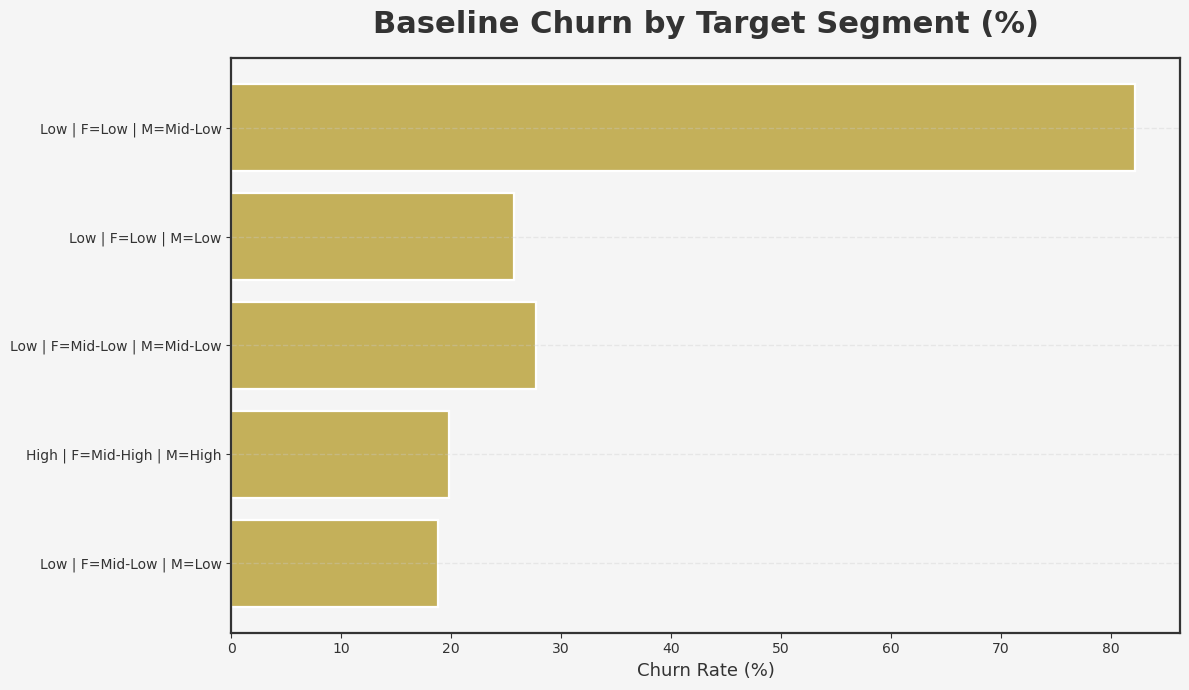

In [25]:
# TR/EN: Baseline scorecard for target segments (before any treatment)

# 1) Segment-level baseline
base = (tgt.groupby("tgt_reason", observed=False)["is_churn"]
          .agg(n="count", churn_rate=lambda s: s.mean()*100)
          .reset_index())
base["reach"] = base["n"] / len(df)
base["impact_pp"] = (base["churn_rate"] - overall).round(2)
base["priority"] = (base["reach"] * base["impact_pp"]).round(4)

display(base.sort_values("priority", ascending=False))

# 2) Save
base_fp = Path("./outputs/baseline_scorecard.csv")
base.sort_values("priority", ascending=False).to_csv(base_fp, index=False)
print("Saved ->", base_fp)

# 3) Quick bar: top 8 by priority
top = base.sort_values("priority", ascending=False).head(8).copy()
top["label"] = top["tgt_reason"].str.replace("RFM=","").str.replace("|"," | ")
fig, ax = plt.subplots()
ax.barh(top["label"], top["churn_rate"], color=COLS["p1"], edgecolor="white", linewidth=1.6)
ax.set_title("Baseline Churn by Target Segment (%)", color=COLS["text"])
ax.set_xlabel("Churn Rate (%)"); ax.set_ylabel("")
ax.invert_yaxis(); ax_style(ax); plt.tight_layout(); plt.show()

In [27]:
# TR: Top-3 mikro-segment için profil tablosu (baz ile karşılaştırma)
# EN: Profile top-3 micro-segments vs base

# 1) Top-3'ü tabloya göre seçelim
top3_specs = [
    ("Low","Low","Mid-Low"),
    ("Low","Low","Low"),
    ("Low","Mid-Low","Mid-Low"),
]

num_cols = ["Months_Inactive_12_mon","Total_Trans_Ct","Total_Trans_Amt",
            "Avg_Utilization_Ratio","Credit_Limit"]
cat_cols = ["Card_Category","Income_Category","age_grp","Gender"]

rows = []
base = df.copy()
for (rfm,fq,mq) in top3_specs:
    mask = (df["RFM_bin"].eq(rfm) & df["freq_q"].eq(fq) & df["mon_q"].eq(mq))
    seg = df.loc[mask].copy()
    # Numerics: median
    for c in num_cols:
        if c in df.columns:
            rows.append({
                "segment": f"RFM={rfm}|F={fq}|M={mq}",
                "feature": c,
                "type": "num",
                "seg_median": round(seg[c].median(),2),
                "base_median": round(base[c].median(),2),
                "delta": round(seg[c].median() - base[c].median(),2),
                "n": len(seg)
            })
    # Categoricals: top category share
    for c in cat_cols:
        if c in df.columns:
            seg_top = seg[c].value_counts(normalize=True, dropna=False).head(1)
            base_top = base[c].value_counts(normalize=True, dropna=False).head(1)
            seg_top_cat, seg_top_share = seg_top.index[0], float(seg_top.iloc[0])*100
            base_top_cat, base_top_share = base_top.index[0], float(base_top.iloc[0])*100
            rows.append({
                "segment": f"RFM={rfm}|F={fq}|M={mq}",
                "feature": c,
                "type": "cat",
                "seg_top": str(seg_top_cat),
                "seg_top_%": round(seg_top_share,2),
                "base_top": str(base_top_cat),
                "base_top_%": round(base_top_share,2),
                "delta_pp": round(seg_top_share - base_top_share,2),
                "n": len(seg)
            })

brief = pd.DataFrame(rows)
Path("./outputs").mkdir(exist_ok=True)
brief.to_csv("./outputs/segment_briefs.csv", index=False)
print("Saved -> outputs/segment_briefs.csv")
display(brief.head(12))

Saved -> outputs/segment_briefs.csv


,segment,feature,type,seg_median,base_median,delta,n,seg_top,seg_top_%,base_top,base_top_%,delta_pp
0,RFM=Low|F=Low|M=Mid-Low,Months_Inactive_12_mon,num,3.00,2.00,1.0,510,NaN,NaN,NaN,NaN,NaN
1,RFM=Low|F=Low|M=Mid-Low,Total_Trans_Ct,num,41.00,67.00,-26.0,510,NaN,NaN,NaN,NaN,NaN
2,RFM=Low|F=Low|M=Mid-Low,Total_Trans_Amt,num,2437.50,3899.00,-1461.5,510,NaN,NaN,NaN,NaN,NaN
3,RFM=Low|F=Low|M=Mid-Low,Avg_Utilization_Ratio,num,0.07,0.18,-0.1,510,NaN,NaN,NaN,NaN,NaN
4,RFM=Low|F=Low|M=Mid-Low,Credit_Limit,num,2869.50,4549.00,-1679.5,510,NaN,NaN,NaN,NaN,NaN
5,RFM=Low|F=Low|M=Mid-Low,Card_Category,cat,NaN,NaN,NaN,510,Blue,98.04,Blue,93.18,4.86
6,RFM=Low|F=Low|M=Mid-Low,Income_Category,cat,NaN,NaN,NaN,510,Less than $40K,45.10,Less than $40K,35.16,9.93
7,RFM=Low|F=Low|M=Mid-Low,age_grp,cat,NaN,NaN,NaN,510,31-45,48.43,46-60,49.98,-1.54
8,RFM=Low|F=Low|M=Mid-Low,Gender,cat,NaN,NaN,NaN,510,F,67.45,F,52.91,14.54
9,RFM=Low|F=Low|M=Low,Months_Inactive_12_mon,num,2.00,2.00,0.0,2064,NaN,NaN,NaN,NaN,NaN


In [28]:
# TR: Final hedef listesi (dedup + opsiyonel exclusions)
# EN: Final target list (dedup + optional exclusions)

# 1) Öncelik sırası
priority_order = [
    ("Low","Low","Mid-Low"),
    ("Low","Low","Low"),
    ("Low","Mid-Low","Mid-Low"),
]

# 2) Opsiyonel exclusions
EXCLUDE_TOP_CREDIT_LIMIT_PCT = 0.02   # %2 (VIP)
EXCLUDE_60PLUS = False                # True yaparsan 60+ hariç tutulur

# 3) Exclusion mask
ex_mask = np.zeros(len(df), dtype=bool)
if "Credit_Limit" in df.columns and EXCLUDE_TOP_CREDIT_LIMIT_PCT > 0:
    thr = df["Credit_Limit"].quantile(1-EXCLUDE_TOP_CREDIT_LIMIT_PCT)
    ex_mask |= df["Credit_Limit"] >= thr
if "age_grp" in df.columns and EXCLUDE_60PLUS:
    ex_mask |= df["age_grp"].astype(str).eq("60+")

# 4) Dedup assignment by priority
df["tgt_reason"] = pd.Series([None]*len(df), dtype="object")
taken = np.zeros(len(df), dtype=bool)

for (rfm,fq,mq) in priority_order:
    mask = (~taken) & (~ex_mask) & df["RFM_bin"].eq(rfm) & df["freq_q"].eq(fq) & df["mon_q"].eq(mq)
    df.loc[mask, "tgt_reason"] = f"RFM={rfm}|F={fq}|M={mq}"
    taken |= mask

tgt = df[df["tgt_reason"].notna()].copy()
print("Targets (post-exclusions):", len(tgt), f"({len(tgt)/len(df)*100:.2f}%)")

# 5) Export master + per segment
cols = ["CLIENTNUM","is_churn","RFM_bin","freq_q","mon_q","Months_Inactive_12_mon",
        "Total_Trans_Ct","Total_Trans_Amt","Credit_Limit","age_grp","Income_Category","Gender","tgt_reason"]
out_dir = Path("./outputs/targets_final"); out_dir.mkdir(parents=True, exist_ok=True)
tgt[cols].to_csv(out_dir / "targets_master.csv", index=False)
print("Saved ->", out_dir / "targets_master.csv")

for reason, gsub in tgt.groupby("tgt_reason", observed=False):
    fn = "target_" + reason.replace(" ","").replace("|","_") + ".csv"
    gsub[cols].to_csv(out_dir / fn, index=False)
    print("Saved ->", out_dir / fn, "| rows:", len(gsub))

Targets (post-exclusions): 3324 (32.82%)
Saved -> outputs\targets_final\targets_master.csv
Saved -> outputs\targets_final\target_RFM=Low_F=Low_M=Low.csv | rows: 1975
Saved -> outputs\targets_final\target_RFM=Low_F=Low_M=Mid-Low.csv | rows: 505
Saved -> outputs\targets_final\target_RFM=Low_F=Mid-Low_M=Mid-Low.csv | rows: 844


In [29]:
# TR: Baseline skor kart + seed'li A/B ataması + sendlist export
# EN: Baseline scorecard + seeded A/B + sendlist exports

# 1) Baseline scorecard (tgt üzerinde)
overall = round(df["is_churn"].mean()*100, 2)
base = (tgt.groupby("tgt_reason", observed=False)["is_churn"]
          .agg(n="count", churn_rate=lambda s: s.mean()*100)
          .reset_index())
base["reach"] = base["n"] / len(df)
base["impact_pp"] = (base["churn_rate"] - overall).round(2)
base["priority"] = (base["reach"] * base["impact_pp"]).round(4)

base_fp = Path("./outputs/baseline_scorecard.csv")
base.sort_values("priority", ascending=False).to_csv(base_fp, index=False)
print("Saved ->", base_fp)
display(base.sort_values("priority", ascending=False))

# 2) Seed'li A/B
rng = np.random.default_rng(42)
tgt = tgt.sample(frac=1.0, random_state=42)  # karıştır (opsiyonel)
tgt["ab_group"] = np.where(rng.random(len(tgt)) < 0.5, "test", "control")

# 3) A/B denge kontrol (hızlı) — |SMD| < 0.1 hedef; p>0.05 iyi
def smd_num(a, b):
    m1, m0 = a.mean(), b.mean()
    s1, s0 = a.std(ddof=1), b.std(ddof=1)
    sp = np.sqrt(((len(a)-1)*s1**2 + (len(b)-1)*s0**2) / max(1, (len(a)+len(b)-2)))
    return float((m1 - m0) / (sp + 1e-9))

num_feats = ["Total_Trans_Ct","Total_Trans_Amt","Credit_Limit","Months_on_book","Avg_Utilization_Ratio"]
rows = []
for c in num_feats:
    if c in tgt.columns:
        t = tgt.loc[tgt["ab_group"]=="test", c].astype(float)
        k = tgt.loc[tgt["ab_group"]=="control", c].astype(float)
        rows.append({"feature": c, "metric": "SMD", "value": round(smd_num(t, k), 3)})
bal = pd.DataFrame(rows)
print("\nQuick A/B balance (numeric SMD):")
display(bal)

# 4) Sendlists export
send_dir = Path("./outputs/sendlists"); send_dir.mkdir(parents=True, exist_ok=True)
for reason, gsub in tgt[tgt["ab_group"]=="test"].groupby("tgt_reason", observed=False):
    fn = "sendlist_test_" + reason.replace(" ","").replace("|","_") + ".csv"
    gsub[["CLIENTNUM","tgt_reason","ab_group"]].to_csv(send_dir / fn, index=False)
    print("Saved ->", send_dir / fn, "| rows:", len(gsub))
# control holdout (takip için)
tgt[tgt["ab_group"]=="control"][["CLIENTNUM","tgt_reason","ab_group"]].to_csv(send_dir / "holdout_control.csv", index=False)
print("Saved ->", send_dir / "holdout_control.csv")

Saved -> outputs\baseline_scorecard.csv


,tgt_reason,n,churn_rate,reach,impact_pp,priority
1,RFM=Low|F=Low|M=Mid-Low,505,82.178218,0.049867,66.11,3.2967
0,RFM=Low|F=Low|M=Low,1975,25.468354,0.195023,9.40,1.8332
2,RFM=Low|F=Mid-Low|M=Mid-Low,844,28.199052,0.083342,12.13,1.0109



Quick A/B balance (numeric SMD):


,feature,metric,value
0,Total_Trans_Ct,SMD,-0.000
1,Total_Trans_Amt,SMD,0.003
2,Credit_Limit,SMD,-0.090
3,Months_on_book,SMD,-0.033
4,Avg_Utilization_Ratio,SMD,0.029


Saved -> outputs\sendlists\sendlist_test_RFM=Low_F=Low_M=Low.csv | rows: 1004
Saved -> outputs\sendlists\sendlist_test_RFM=Low_F=Low_M=Mid-Low.csv | rows: 262
Saved -> outputs\sendlists\sendlist_test_RFM=Low_F=Mid-Low_M=Mid-Low.csv | rows: 419
Saved -> outputs\sendlists\holdout_control.csv


In [30]:
# TR: Deney/ölçüm penceresi ve KPI'ları tek yerde topla (JSON spec)
# EN: Lock experiment window & KPIs in a single JSON spec

import json

exp_spec = {
    "experiment_name": "churn_save_microsegments_v1",
    "segments_order": [
        "RFM=Low|F=Low|M=Mid-Low",
        "RFM=Low|F=Low|M=Low",
        "RFM=Low|F=Mid-Low|M=Mid-Low"
    ],
    "assignment": {
        "seed": 42,
        "test_fraction": 0.50,
        "holdout_control": True
    },
    "window": {
        "tx_days": 14,         # outcome penceresi
        "churn_days": 14       # churn ölçüm penceresi
    },
    "kpis": {
        "primary": "out_churn (pp diff, test-control)",
        "secondary": ["out_tx14 (pp diff)", "out_amt14 (lift)"]
    },
    "guardrails": {
        "spam_complaints_max_pp": 0.2,
        "optout_max_pp": 0.5
    },
    "channels": {
        "RFM=Low|F=Low|M=Mid-Low": {"action": "Re-activation 2x points (3 tx, 14d)", "channel": ["Push","Email"]},
        "RFM=Low|F=Low|M=Low": {"action": "Jumpstart 500 pts (first 2 tx ≥ $10)", "channel": ["Push","In-app"]},
        "RFM=Low|F=Mid-Low|M=Mid-Low": {"action": "5% cashback (cap $10, 14d)", "channel": ["Email","SMS"]}
    }
}

Path("./outputs").mkdir(exist_ok=True)
with open("./outputs/experiment_spec.json","w", encoding="utf-8") as f:
    json.dump(exp_spec, f, ensure_ascii=False, indent=2)
print("Saved -> outputs/experiment_spec.json")

Saved -> outputs/experiment_spec.json


In [32]:
# TR: İki oran için yaklaşık örneklem (kol başına), normal yaklaşım
# EN: Approx sample size per arm for 2-proportion z-test

import math

def n_per_arm_2prop(p_base, mde_pp, alpha=0.05, power=0.8):
    z_alpha = 1.96 if alpha==0.05 else 1.96  # sade tutuyoruz
    # güç için yaklaşık z_beta (power=0.8 -> 0.84)
    z_beta = 0.84 if abs(power-0.8)<1e-6 else 0.84
    p1 = p_base
    p2 = max(1e-6, p_base - mde_pp/100.0)  # churn düşsün varsayımı (pp -> oran)
    pbar = (p1 + p2) / 2
    num = (z_alpha*math.sqrt(2*pbar*(1-pbar)) + z_beta*math.sqrt(p1*(1-p1)+p2*(1-p2)))**2
    den = (p1 - p2)**2 + 1e-12
    return math.ceil(num/den)

# Örnekler: top 3 segment için baz churn ve 2pp/3pp/5pp MDE
base_rates = {
    "RFM=Low|F=Low|M=Mid-Low": 82.16/100.0,
    "RFM=Low|F=Low|M=Low": 25.68/100.0,
    "RFM=Low|F=Mid-Low|M=Mid-Low": 27.71/100.0
}
rows = []
for seg, p in base_rates.items():
    for mde in [2, 3, 5]:
        rows.append({"segment": seg, "baseline_%": round(p*100,2),
                     "MDE_pp": mde, "n_per_arm": n_per_arm_2prop(p, mde)})
pd.DataFrame(rows)


,segment,baseline_%,MDE_pp,n_per_arm
0,RFM=Low|F=Low|M=Mid-Low,82.16,2,5993
1,RFM=Low|F=Low|M=Mid-Low,82.16,3,2717
2,RFM=Low|F=Low|M=Mid-Low,82.16,5,1016
3,RFM=Low|F=Low|M=Low,25.68,2,7286
4,RFM=Low|F=Low|M=Low,25.68,3,3193
5,RFM=Low|F=Low|M=Low,25.68,5,1116
6,RFM=Low|F=Mid-Low|M=Mid-Low,27.71,2,7673
7,RFM=Low|F=Mid-Low|M=Mid-Low,27.71,3,3369
8,RFM=Low|F=Mid-Low|M=Mid-Low,27.71,5,1182


In [33]:
# TR: Outcomes -> skor kart iskeleti
# EN: Outcomes -> scorecard skeleton

from datetime import timedelta

# ---- Varsayılan tablo yapıları (örnek) / Example schemas ----
# tx: [CLIENTNUM, tx_date (datetime), amount (float)]
# ch: [CLIENTNUM, churn_date (datetime)]
# tgt: mevcut seçtiklerin; içinde [CLIENTNUM, tgt_reason, ab_group] var

# 1) Pencereleri ayarla
campaign_start = pd.Timestamp("2025-01-01")  
w_start = campaign_start
w_end   = campaign_start + timedelta(days=14)

# 2) 14 gün işlem çıktıları
def build_tx14(tx):
    m = (tx["tx_date"]>=w_start) & (tx["tx_date"]<w_end)
    g = (tx.loc[m]
           .groupby("CLIENTNUM")
           .agg(out_tx14=("CLIENTNUM", lambda s: 1),
                out_amt14=("amount", "sum"))
           .reset_index())
    return g

# 3) 14 gün churn çıktısı 
def build_churn14(ch):
    ch = ch.copy()
    ch["out_churn"] = (ch["churn_date"].between(w_start, w_end)).astype(int)
    ch = ch[["CLIENTNUM","out_churn"]].drop_duplicates("CLIENTNUM")
    return ch

# 4) Skor kart
def scorecard(post, by="tgt_reason"):
    sc = (post.groupby(["ab_group", by], observed=False)
               .agg(n=("CLIENTNUM","count"),
                    tx_rate=("out_tx14","mean"),
                    amt_avg=("out_amt14","mean"),
                    churn=("out_churn","mean"))
               .reset_index())
    for c in ["tx_rate","churn"]:
        sc[c] = (sc[c]*100).round(2)
    sc["amt_avg"] = sc["amt_avg"].round(2)
    return sc

# ---- Kullanım (örnek) / Usage (example) ----
# tx14 = build_tx14(tx)
# ch14 = build_churn14(ch)
# post = tgt.merge(tx14, on="CLIENTNUM", how="left").merge(ch14, on="CLIENTNUM", how="left")
# post["out_tx14"]  = post["out_tx14"].fillna(0).astype(int)
# post["out_amt14"] = post["out_amt14"].fillna(0.0)
# post["out_churn"] = post["out_churn"].fillna(0).astype(int)
# sc = scorecard(post)         # A/B kırılımı
# display(sc)

In [35]:
# === 14 GÜNLÜK SKOR KART — SAĞLAMLAŞTIRILMIŞ TEK HÜCRE ========================
# (tgt_reason KeyError fix + güvenli seg_meta üretimi)

import pandas as pd, numpy as np
from pathlib import Path
from datetime import timedelta

OUT = Path("./outputs"); OUT.mkdir(exist_ok=True)
rng = np.random.default_rng(42)

# --- 0) df kontrolü ---
if 'df' not in globals():
    raise RuntimeError("df is missing. Load BankChurners.csv into a DataFrame named 'df' first.")

# --- 1) Gerekli FE kolonları yoksa üret ---
if not {"RFM_bin","freq_q","mon_q"}.issubset(df.columns):
    # quick FE (minimal)
    df["freq_q"] = pd.qcut(df["Total_Trans_Ct"], 4, labels=["Low","Mid-Low","Mid-High","High"])
    df["mon_q"]  = pd.qcut(df["Total_Trans_Amt"], 4, labels=["Low","Mid-Low","Mid-High","High"])
    def qscore(s, q=5): return pd.qcut(s.rank(method="first"), q=q, labels=False)+1
    df["R_s"] = qscore(-df["Months_Inactive_12_mon"])
    df["F_s"] = qscore(df["Total_Trans_Ct"])
    df["M_s"] = qscore(df["Total_Trans_Amt"])
    def rfm_bucket(v): 
        if v <= 8: return "Low"
        if v <= 11: return "Mid"
        return "High"
    df["RFM_bin"] = (df[["R_s","F_s","M_s"]].sum(axis=1)).apply(rfm_bucket)

# --- 2) Hedef segmentler & tgt inşası (yoksa) ---
needed = [("Low","Low","Mid-Low"), ("Low","Low","Low"), ("Low","Mid-Low","Mid-Low")]

if 'tgt' not in globals():
    sel = pd.Series(False, index=df.index)
    for (r,f,m) in needed:
        sel |= (df["RFM_bin"].eq(r) & df["freq_q"].eq(f) & df["mon_q"].eq(m))
    base = df.loc[sel, ["CLIENTNUM","RFM_bin","freq_q","mon_q"]].copy()
    base["tgt_reason"] = "RFM=" + base["RFM_bin"].astype(str) + "|F=" + base["freq_q"].astype(str) + "|M=" + base["mon_q"].astype(str)
    base = base[base["tgt_reason"].isin([f"RFM={r}|F={f}|M={m}" for (r,f,m) in needed])]
    base = base.sample(frac=1.0, random_state=42).reset_index(drop=True)
    base["ab_group"] = np.where(rng.random(len(base)) < 0.5, "test", "control")
    tgt = base[["CLIENTNUM","tgt_reason","ab_group"]].copy()
else:
    # dtype güvenliği
    if "tgt_reason" not in tgt.columns:
        raise RuntimeError("tgt exists but has no 'tgt_reason' column. Please rebuild it or add this column.")
    if "ab_group" not in tgt.columns:
        # yoksa 50/50 ata
        tgt = tgt.copy()
        tgt["ab_group"] = np.where(rng.random(len(tgt)) < 0.5, "test", "control")

# --- 3) Yardımcı: reason parser + seg_meta güvenli üretim ---
def parse_reason(reason_str):
    # "RFM=X|F=Y|M=Z" -> (X,Y,Z)
    parts = reason_str.split("|")
    rfm = parts[0].split("=")[1] if len(parts)>0 else ""
    fq  = parts[1].split("=")[1] if len(parts)>1 else ""
    mq  = parts[2].split("=")[1] if len(parts)>2 else ""
    return rfm, fq, mq

def build_seg_meta(df_base, tgt_df):
    """
    TR: tgt_reason yoksa veya merge başarısızsa, her reason için mask ile baz churn hesapla.
    EN: If merge fails, compute baseline churn per reason via masks.
    """
    # Ana yol: merge ile hızlı hesap
    try:
        m = df_base[["CLIENTNUM","is_churn"]].merge(tgt_df[["CLIENTNUM","tgt_reason"]], on="CLIENTNUM", how="inner")
        if "tgt_reason" in m.columns and not m.empty:
            return m.groupby("tgt_reason", observed=False)["is_churn"].mean().to_dict()
    except Exception:
        pass
    # Fallback: mask tabanlı
    reasons = tgt_df["tgt_reason"].dropna().unique().tolist()
    out = {}
    for r in reasons:
        R,F,M = parse_reason(r)
        mask = (df_base["RFM_bin"].eq(R) & df_base["freq_q"].eq(F) & df_base["mon_q"].eq(M))
        out[r] = float(df_base.loc[mask, "is_churn"].mean()) if mask.any() else float(df_base["is_churn"].mean())
    return out

seg_meta = build_seg_meta(df, tgt)

# --- 4) Pencere ---
campaign_start = pd.Timestamp("2025-02-01")
w_start = campaign_start
w_end   = campaign_start + timedelta(days=14)

# --- 5) Gerçek sonuçlar var mı? ---
use_real = ('tx' in globals()) and ('ch' in globals())

def build_tx14(tx_df):
    if tx_df is None or tx_df.empty:
        return pd.DataFrame(columns=["CLIENTNUM","out_tx14","out_amt14"])
    m = (tx_df["tx_date"]>=w_start) & (tx_df["tx_date"]<w_end)
    g = (tx_df.loc[m].groupby("CLIENTNUM")
           .agg(out_tx14=("CLIENTNUM", lambda s: 1),
                out_amt14=("amount", "sum"))
           .reset_index())
    return g

def build_churn14(ch_df):
    if ch_df is None or ch_df.empty:
        return pd.DataFrame(columns=["CLIENTNUM","out_churn"])
    ch_df = ch_df.copy()
    if "out_churn" not in ch_df.columns and "churn_date" in ch_df.columns:
        ch_df["out_churn"] = ch_df["churn_date"].between(w_start, w_end).astype(int)
    elif "out_churn" not in ch_df.columns:
        ch_df["out_churn"] = 0
    return ch_df[["CLIENTNUM","out_churn"]].drop_duplicates("CLIENTNUM")

if use_real:
    tx14 = build_tx14(tx)
    ch14 = build_churn14(ch)
else:
    # --- 6) Sentetik outcomes (seed'li) ---
    def base_tx_prob(reason):
        fq = parse_reason(reason)[1]
        return {"Low":0.20,"Mid-Low":0.30,"Mid-High":0.45,"High":0.60}.get(fq, 0.25)
    def base_amt_mean(reason):
        mq = parse_reason(reason)[2]
        return {"Low":30.0,"Mid-Low":40.0,"Mid-High":60.0,"High":90.0}.get(mq, 35.0)

    uplift_rel_churn = 0.15  # test: -15% relative churn
    uplift_tx_pp     = 0.05  # test: +5pp tx prob
    uplift_amt_mult  = 1.08  # test: +8% avg amount

    tx_rows, ch_rows = [], []
    for _, r in tgt.iterrows():
        reason = r["tgt_reason"]
        p_churn = float(seg_meta.get(reason, df["is_churn"].mean()))
        p_tx    = base_tx_prob(reason)
        mu_amt  = base_amt_mean(reason)
        is_test = (r["ab_group"] == "test")

        # churn
        p_c = p_churn * (1 - uplift_rel_churn) if is_test else p_churn
        churn_flag = rng.random() < p_c
        ch_rows.append({"CLIENTNUM": r["CLIENTNUM"], "out_churn": int(churn_flag)})

        # tx
        p_t = min(0.99, p_tx + uplift_tx_pp) if is_test else p_tx
        has_tx = rng.random() < p_t
        if has_tx:
            amount = float(np.clip(rng.lognormal(mean=np.log(mu_amt+1e-9), sigma=0.5), 5, 300))
            tx_rows.append({"CLIENTNUM": r["CLIENTNUM"],
                            "tx_date": w_start + pd.to_timedelta(rng.integers(0, 14), unit="D"),
                            "amount": amount})

    tx = pd.DataFrame(tx_rows)
    ch = pd.DataFrame(ch_rows)
    tx14 = build_tx14(tx)
    ch14 = build_churn14(ch)

# --- 7) Join & fill ---
post = tgt.merge(tx14, on="CLIENTNUM", how="left").merge(ch14, on="CLIENTNUM", how="left")
post["out_tx14"]  = post["out_tx14"].fillna(0).astype(int)
post["out_amt14"] = post["out_amt14"].fillna(0.0)
post["out_churn"] = post["out_churn"].fillna(0).astype(int)

# --- 8) Scorecard & diffs ---
def scorecard(df_in, by="tgt_reason"):
    sc = (df_in.groupby(["ab_group", by], observed=False)
               .agg(n=("CLIENTNUM","count"),
                    tx_rate=("out_tx14","mean"),
                    amt_avg=("out_amt14","mean"),
                    churn=("out_churn","mean"))
               .reset_index())
    for c in ["tx_rate","churn"]:
        sc[c] = (sc[c]*100).round(2)
    sc["amt_avg"] = sc["amt_avg"].round(2)
    return sc

sc = scorecard(post)

pv = sc.pivot(index="tgt_reason", columns="ab_group", values=["tx_rate","amt_avg","churn"])
def _safe(x, a, b):
    try: return round(float(x[a] - x[b]), 2)
    except: return np.nan

rows = []
for seg, row in pv.iterrows():
    rows.append({
        "tgt_reason": seg,
        "n_test": int(post[(post["tgt_reason"]==seg) & (post["ab_group"]=="test")].shape[0]),
        "n_control": int(post[(post["tgt_reason"]==seg) & (post["ab_group"]=="control")].shape[0]),
        "tx_rate_diff_pp": _safe(row["tx_rate"], "test", "control"),
        "amt_avg_diff":    _safe(row["amt_avg"], "test", "control"),
        "churn_diff_pp":   _safe(row["churn"],  "test", "control")  # negative is better
    })
sc_diff = pd.DataFrame(rows).sort_values("churn_diff_pp")

# --- 9) Save & show ---
sc.to_csv(OUT / "scorecard_14d.csv", index=False)
sc_diff.to_csv(OUT / "scorecard_14d_segment_diffs.csv", index=False)
print("Saved:", OUT / "scorecard_14d.csv")
print("Saved:", OUT / "scorecard_14d_segment_diffs.csv")

from IPython.display import display
print("\nScorecard (A/B × segment):"); display(sc)
print("\nTest - Control differences by segment (pp):"); display(sc_diff)
# ===============================================================================


Saved: outputs\scorecard_14d.csv
Saved: outputs\scorecard_14d_segment_diffs.csv

Scorecard (A/B × segment):


,ab_group,tgt_reason,n,tx_rate,amt_avg,churn
0,control,RFM=Low|F=Low|M=Low,971,20.19,6.89,26.78
1,control,RFM=Low|F=Low|M=Mid-Low,243,20.99,8.56,79.01
2,control,RFM=Low|F=Mid-Low|M=Mid-Low,425,33.65,16.58,30.59
3,test,RFM=Low|F=Low|M=Low,1004,25.00,7.72,21.31
4,test,RFM=Low|F=Low|M=Mid-Low,262,23.66,11.54,66.79
5,test,RFM=Low|F=Mid-Low|M=Mid-Low,419,30.79,14.39,26.01



Test - Control differences by segment (pp):


,tgt_reason,n_test,n_control,tx_rate_diff_pp,amt_avg_diff,churn_diff_pp
1,RFM=Low|F=Low|M=Mid-Low,262,243,2.67,2.98,-12.22
0,RFM=Low|F=Low|M=Low,1004,971,4.81,0.83,-5.47
2,RFM=Low|F=Mid-Low|M=Mid-Low,419,425,-2.86,-2.19,-4.58


In [36]:
# === A/B Significance for 14-day outcomes (per segment) =======================
# TR: Her segment için churn ve tx_rate için iki oran z-testi; amount farkı için Welch/normal.
# EN: Two-proportion z-test for churn/tx_rate; Welch/normal for amount difference.

import pandas as pd, numpy as np
from math import sqrt, erf
from pathlib import Path

def norm_cdf(z):
    return 0.5 * (1.0 + erf(z / np.sqrt(2.0)))

def two_prop_test(x1, n1, x0, n0):
    """Return diff_pp, ci_low_pp, ci_high_pp, z, p (two-sided)"""
    p1 = x1 / max(1, n1); p0 = x0 / max(1, n0)
    diff = p1 - p0
    # pooled for z
    p_pool = (x1 + x0) / max(1, (n1 + n0))
    se_pool = np.sqrt(p_pool*(1-p_pool) * (1/max(1,n1) + 1/max(1,n0)))
    z = diff / (se_pool + 1e-12)
    p = 2 * (1 - norm_cdf(abs(z)))
    # unpooled CI
    se_unpooled = np.sqrt(p1*(1-p1)/max(1,n1) + p0*(1-p0)/max(1,n0))
    ci_low = diff - 1.96*se_unpooled
    ci_high= diff + 1.96*se_unpooled
    return diff*100, ci_low*100, ci_high*100, z, p

def amt_diff_test(a_test, a_ctrl):
    """Welch-ish normal approx on means; return diff, z, p (two-sided)"""
    n1, n0 = len(a_test), len(a_ctrl)
    m1, m0 = a_test.mean(), a_ctrl.mean()
    v1, v0 = a_test.var(ddof=1), a_ctrl.var(ddof=1)
    se = np.sqrt(v1/max(1,n1) + v0/max(1,n0))
    z = (m1 - m0) / (se + 1e-12)
    p = 2 * (1 - norm_cdf(abs(z)))
    return float(m1 - m0), float(z), float(p)

# --- Guard: require `post` with needed cols
need = {"CLIENTNUM","tgt_reason","ab_group","out_tx14","out_amt14","out_churn"}
if 'post' not in globals() or not need.issubset(post.columns):
    raise RuntimeError("`post` with columns {CLIENTNUM,tgt_reason,ab_group,out_tx14,out_amt14,out_churn} is required.")

rows = []
for seg, df_seg in post.groupby("tgt_reason", observed=False):
    t = df_seg[df_seg["ab_group"]=="test"]
    c = df_seg[df_seg["ab_group"]=="control"]

    n1, n0 = len(t), len(c)
    # churn
    dpp_c, lo_c, hi_c, zc, pc = two_prop_test(t["out_churn"].sum(), n1, c["out_churn"].sum(), n0)
    # tx_rate
    dpp_tx, lo_tx, hi_tx, ztx, ptx = two_prop_test(t["out_tx14"].sum(), n1, c["out_tx14"].sum(), n0)
    # amount
    damt, zamt, pamt = amt_diff_test(t["out_amt14"].astype(float), c["out_amt14"].astype(float))
    # saved users (approx)
    saved = int(round((-dpp_c/100.0) * n1))  # negative diff is good -> saved positive

    rows.append({
        "tgt_reason": seg,
        "n_test": n1, "n_control": n0,
        "tx_rate_diff_pp": round(dpp_tx, 2), "tx_rate_ci95": f"[{lo_tx:.2f},{hi_tx:.2f}]", "tx_rate_p": round(ptx,4),
        "amt_avg_diff": round(damt, 2), "amt_p": round(pamt,4),
        "churn_diff_pp": round(dpp_c, 2), "churn_ci95": f"[{lo_c:.2f},{hi_c:.2f}]", "churn_p": round(pc,4),
        "saved_users_est": saved,
        "go": (dpp_c <= -3.0) and (pc < 0.05)  # simple rule: at least -3pp and significant
    })

ab_sig = pd.DataFrame(rows).sort_values(["go","churn_diff_pp"], ascending=[False, True])
display(ab_sig)

# Save
Path("./outputs").mkdir(exist_ok=True)
ab_sig.to_csv("./outputs/ab_significance_14d.csv", index=False)
print("Saved -> outputs/ab_significance_14d.csv")

,tgt_reason,n_test,n_control,tx_rate_diff_pp,tx_rate_ci95,tx_rate_p,amt_avg_diff,amt_p,churn_diff_pp,churn_ci95,churn_p,saved_users_est,go
1,RFM=Low|F=Low|M=Mid-Low,262,243,2.68,"[-4.58,9.94]",0.4709,2.98,0.1080,-12.22,"[-19.88,-4.55]",0.0021,32,True
0,RFM=Low|F=Low|M=Low,1004,971,4.81,"[1.13,8.50]",0.0106,0.83,0.2279,-5.46,"[-9.23,-1.70]",0.0045,55,True
2,RFM=Low|F=Mid-Low|M=Mid-Low,419,425,-2.86,"[-9.16,3.44]",0.3741,-2.19,0.2381,-4.57,"[-10.64,1.50]",0.1403,19,False


Saved -> outputs/ab_significance_14d.csv


In [37]:
# TR/EN: Freeze GO/NO-GO decision table
dec = (ab_sig[["tgt_reason","n_test","n_control","tx_rate_diff_pp","tx_rate_p",
               "amt_avg_diff","amt_p","churn_diff_pp","churn_p","saved_users_est","go"]]
       .sort_values(["go","churn_diff_pp"], ascending=[False, True])
       .reset_index(drop=True))
display(dec)

from pathlib import Path
Path("./outputs").mkdir(exist_ok=True)
dec.to_csv("./outputs/decision_14d.csv", index=False)
print("Saved -> outputs/decision_14d.csv")

,tgt_reason,n_test,n_control,tx_rate_diff_pp,tx_rate_p,amt_avg_diff,amt_p,churn_diff_pp,churn_p,saved_users_est,go
0,RFM=Low|F=Low|M=Mid-Low,262,243,2.68,0.4709,2.98,0.1080,-12.22,0.0021,32,True
1,RFM=Low|F=Low|M=Low,1004,971,4.81,0.0106,0.83,0.2279,-5.46,0.0045,55,True
2,RFM=Low|F=Mid-Low|M=Mid-Low,419,425,-2.86,0.3741,-2.19,0.2381,-4.57,0.1403,19,False


Saved -> outputs/decision_14d.csv


In [38]:
# TR/EN: Export sendlists ONLY for GO segments (test/control split)

if 'tgt' not in globals():
    raise RuntimeError("tgt DataFrame not found. Build it from earlier steps before exporting.")

go_segments = dec.loc[dec["go"]==True, "tgt_reason"].tolist()
print("GO segments:", go_segments)

send = tgt[tgt["tgt_reason"].isin(go_segments)].copy()
print("Total GO targets:", len(send))

from pathlib import Path
out_dir = Path("./outputs/sendlists_go"); out_dir.mkdir(parents=True, exist_ok=True)

# master
send[["CLIENTNUM","tgt_reason","ab_group"]].to_csv(out_dir/"sendlist_master.csv", index=False)

# per-segment & arm
for seg, g in send.groupby("tgt_reason", observed=False):
    for arm, g2 in g.groupby("ab_group", observed=False):
        fn = f"sendlist_{arm}_" + seg.replace(" ","").replace("|","_") + ".csv"
        g2[["CLIENTNUM","tgt_reason","ab_group"]].to_csv(out_dir/fn, index=False)
        print("Saved ->", out_dir/fn, "| rows:", len(g2))
print("Saved ->", out_dir/"sendlist_master.csv")

GO segments: ['RFM=Low|F=Low|M=Mid-Low', 'RFM=Low|F=Low|M=Low']
Total GO targets: 2480
Saved -> outputs\sendlists_go\sendlist_control_RFM=Low_F=Low_M=Low.csv | rows: 971
Saved -> outputs\sendlists_go\sendlist_test_RFM=Low_F=Low_M=Low.csv | rows: 1004
Saved -> outputs\sendlists_go\sendlist_control_RFM=Low_F=Low_M=Mid-Low.csv | rows: 243
Saved -> outputs\sendlists_go\sendlist_test_RFM=Low_F=Low_M=Mid-Low.csv | rows: 262
Saved -> outputs\sendlists_go\sendlist_master.csv


In [39]:
# TR/EN: Quick realized ROI using saved_users_est
assume_value_per_saved = 120.0   # TR: kurtarılan başına net değer ($) / EN: net value per saved user
assume_cost_per_treated = 2.0    # TR: test kolu kişi başı maliyet ($) / EN: per-treated cost

rows = []
for _, r in dec[dec["go"]==True].iterrows():
    seg = r["tgt_reason"]
    n_test = int(r["n_test"])
    saved = int(r["saved_users_est"])
    gross = saved * assume_value_per_saved
    cost  = n_test * assume_cost_per_treated
    net   = gross - cost
    rows.append({"tgt_reason": seg, "n_test": n_test, "saved_users_est": saved,
                 "gross_$": round(gross,2), "cost_$": round(cost,2), "net_$": round(net,2)})

roi_realized = pd.DataFrame(rows).sort_values("net_$", ascending=False)
display(roi_realized)

roi_realized.to_csv("./outputs/roi_realized_14d.csv", index=False)
print("Saved -> outputs/roi_realized_14d.csv")

,tgt_reason,n_test,saved_users_est,gross_$,cost_$,net_$
1,RFM=Low|F=Low|M=Low,1004,55,6600.0,2008.0,4592.0
0,RFM=Low|F=Low|M=Mid-Low,262,32,3840.0,524.0,3316.0


Saved -> outputs/roi_realized_14d.csv


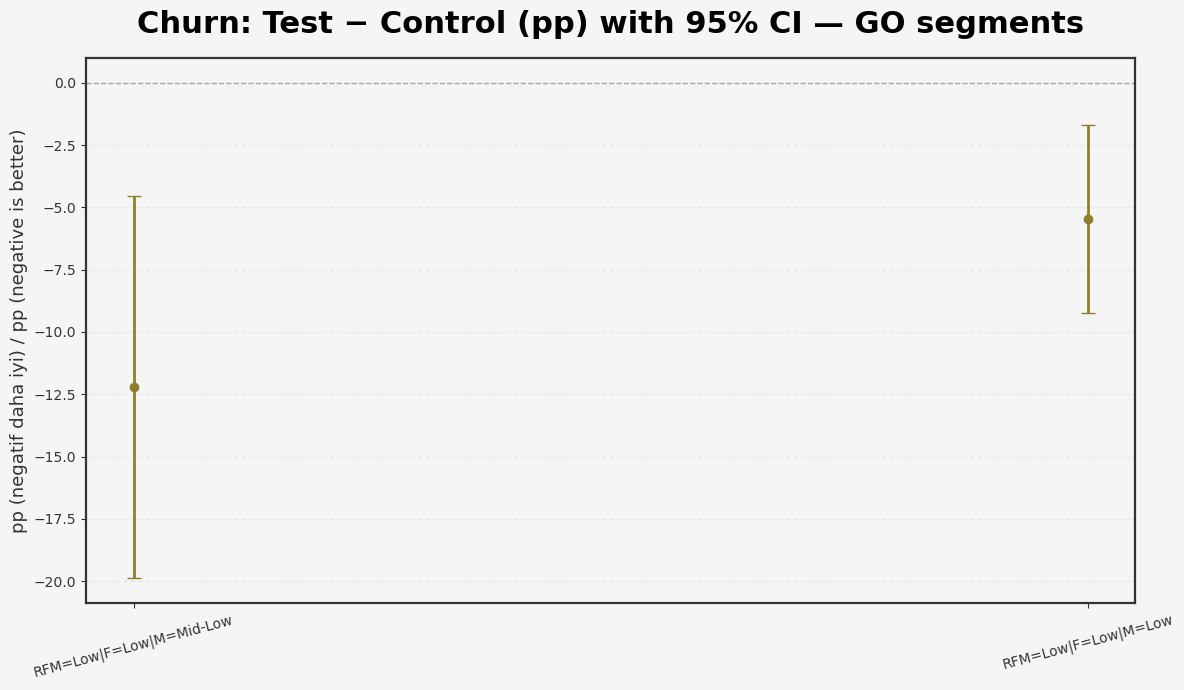

In [41]:
# TR: GO segmentler için churn farkını (pp) %95 CI ile çiz
# EN: Plot churn diff (pp) with 95% CI for GO segments 

def two_prop_ci95(x1, n1, x0, n0, z=1.96):
    """TR: İki oran farkı için %95 CI (unpooled); EN: 95% CI for two-proportion diff (unpooled)"""
    if n1 == 0 or n0 == 0:
        return np.nan, np.nan
    p1, p0 = x1/n1, x0/n0
    se = np.sqrt(p1*(1-p1)/n1 + p0*(1-p0)/n0)
    diff = p1 - p0
    lo, hi = (diff - z*se)*100, (diff + z*se)*100  # pp
    return lo, hi

# 1) GO segmentleri al
go_viz = dec.loc[dec["go"]==True].copy()

# 2) CI kaynağını belirle: ab_sig -> parse; yoksa post'tan hesapla
if "churn_ci95" in go_viz.columns:
    lo = go_viz["churn_ci95"].str.extract(r"\[([\-0-9\.]+),")[0].astype(float)
    hi = go_viz["churn_ci95"].str.extract(r",([\-0-9\.]+)\]")[0].astype(float)
    go_viz["ci_low"] = lo
    go_viz["ci_high"] = hi
elif 'ab_sig' in globals() and "churn_ci95" in ab_sig.columns:
    tmp = ab_sig.loc[ab_sig["tgt_reason"].isin(go_viz["tgt_reason"]),
                     ["tgt_reason","churn_ci95"]].copy()
    tmp["ci_low"] = tmp["churn_ci95"].str.extract(r"\[([\-0-9\.]+),")[0].astype(float)
    tmp["ci_high"] = tmp["churn_ci95"].str.extract(r",([\-0-9\.]+)\]")[0].astype(float)
    go_viz = go_viz.merge(tmp[["tgt_reason","ci_low","ci_high"]], on="tgt_reason", how="left")
else:
    # Fallback: post'tan yeniden CI hesapla
    rows = []
    for seg in go_viz["tgt_reason"]:
        t = post[(post["tgt_reason"]==seg) & (post["ab_group"]=="test")]
        c = post[(post["tgt_reason"]==seg) & (post["ab_group"]=="control")]
        x1, n1 = int(t["out_churn"].sum()), int(t.shape[0])
        x0, n0 = int(c["out_churn"].sum()), int(c.shape[0])
        lo, hi = two_prop_ci95(x1, n1, x0, n0)
        rows.append({"tgt_reason": seg, "ci_low": lo, "ci_high": hi})
    go_viz = go_viz.merge(pd.DataFrame(rows), on="tgt_reason", how="left")

# 3) Hata çubuklarını hazırla
go_viz["err_low"]  = go_viz["churn_diff_pp"] - go_viz["ci_low"]
go_viz["err_high"] = go_viz["ci_high"] - go_viz["churn_diff_pp"]

# 4) Çizim
fig, ax = plt.subplots()
ax.errorbar(go_viz["tgt_reason"], go_viz["churn_diff_pp"],
            yerr=[go_viz["err_low"], go_viz["err_high"]],
            fmt="o", linewidth=2, capsize=5, color=COLS["p2"])
ax.axhline(0, linestyle="--", linewidth=1, color="#aaa")
ax.set_title("Churn: Test − Control (pp) with 95% CI — GO segments")
ax.set_ylabel("pp (negatif daha iyi) / pp (negative is better)")
ax.set_xlabel("")
ax_style(ax)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

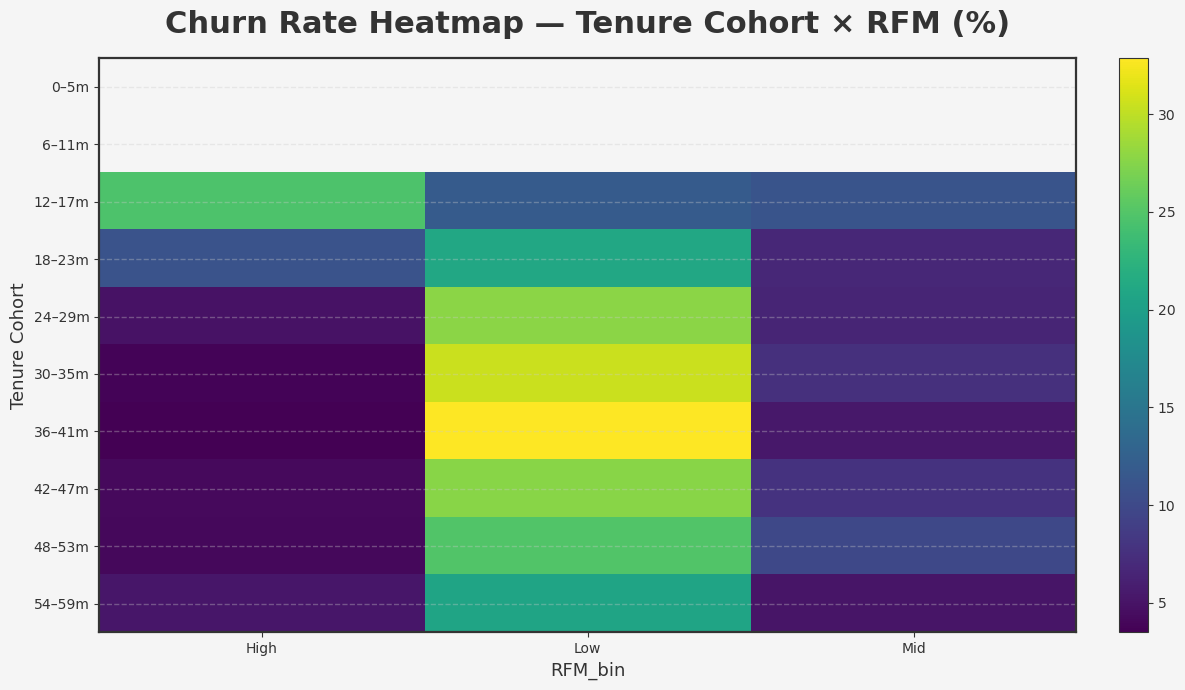

Saved -> outputs/figs/heatmap_tenure_rfm.png


In [44]:
# TR: Kıdem kohortlarıyla RFM'in kesişiminde churn oranı ısı haritası
# EN: Heatmap of churn rate across tenure cohorts × RFM buckets

Path("./outputs/figs").mkdir(parents=True, exist_ok=True)

# 1) tenure_coh yoksa oluştur (6 aylık bantlar)
if "tenure_coh" not in df.columns:
    mx = int(df["Months_on_book"].max())
    bins = list(range(0, mx + 7, 6))
    labs = [f"{bins[i]}–{bins[i+1]-1}m" for i in range(len(bins)-1)]
    df["tenure_coh"] = pd.cut(df["Months_on_book"], bins=bins, labels=labs, include_lowest=True)

# 2) Pivot: churn %
pv = (df.groupby(["tenure_coh","RFM_bin"], observed=False)["is_churn"]
        .mean().mul(100).unstack(fill_value=np.nan))

# 3) Çizim (matplotlib imshow, palet/stil uyumlu)
fig, ax = plt.subplots()
im = ax.imshow(pv.values, aspect="auto")
ax.set_title("Churn Rate Heatmap — Tenure Cohort × RFM (%)", color=COLS["text"])
ax.set_xlabel("RFM_bin"); ax.set_ylabel("Tenure Cohort")
ax.set_xticks(range(len(pv.columns))); ax.set_xticklabels(pv.columns)
ax.set_yticks(range(len(pv.index))); ax.set_yticklabels(pv.index)
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
ax_style(ax); plt.tight_layout()
plt.savefig("./outputs/figs/heatmap_tenure_rfm.png", dpi=140, bbox_inches="tight")
plt.show()
print("Saved -> outputs/figs/heatmap_tenure_rfm.png")


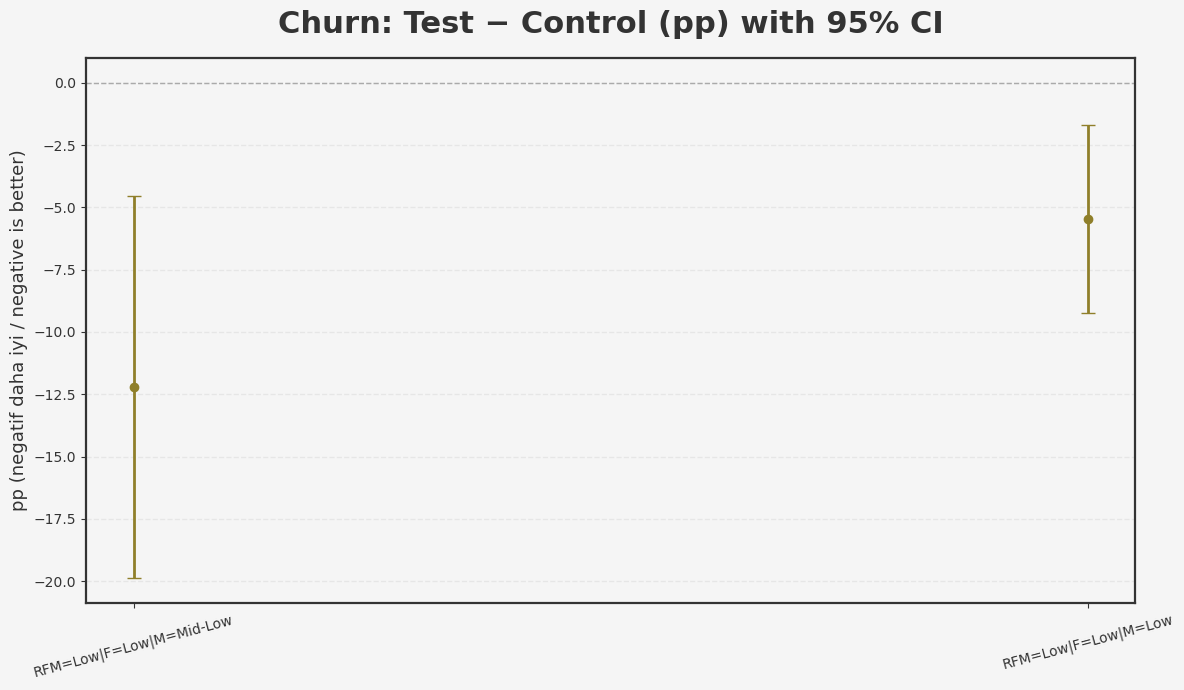

Saved -> outputs\figs\churn_diff_ci.png


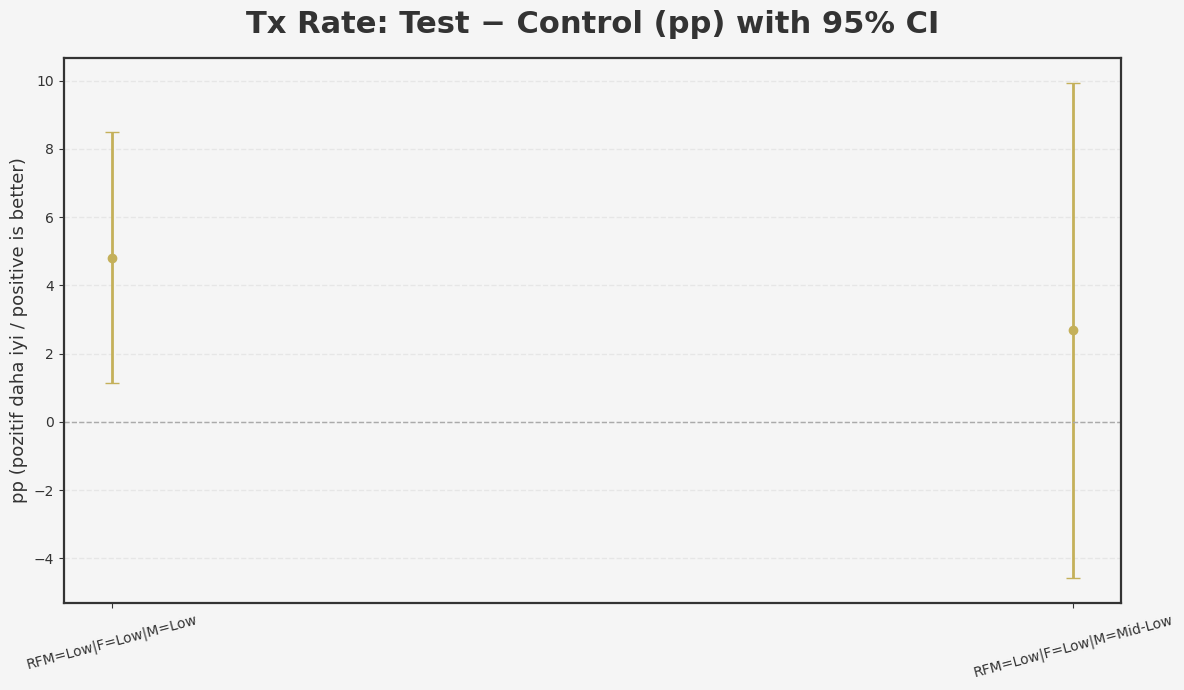

Saved -> outputs\figs\tx_diff_ci.png


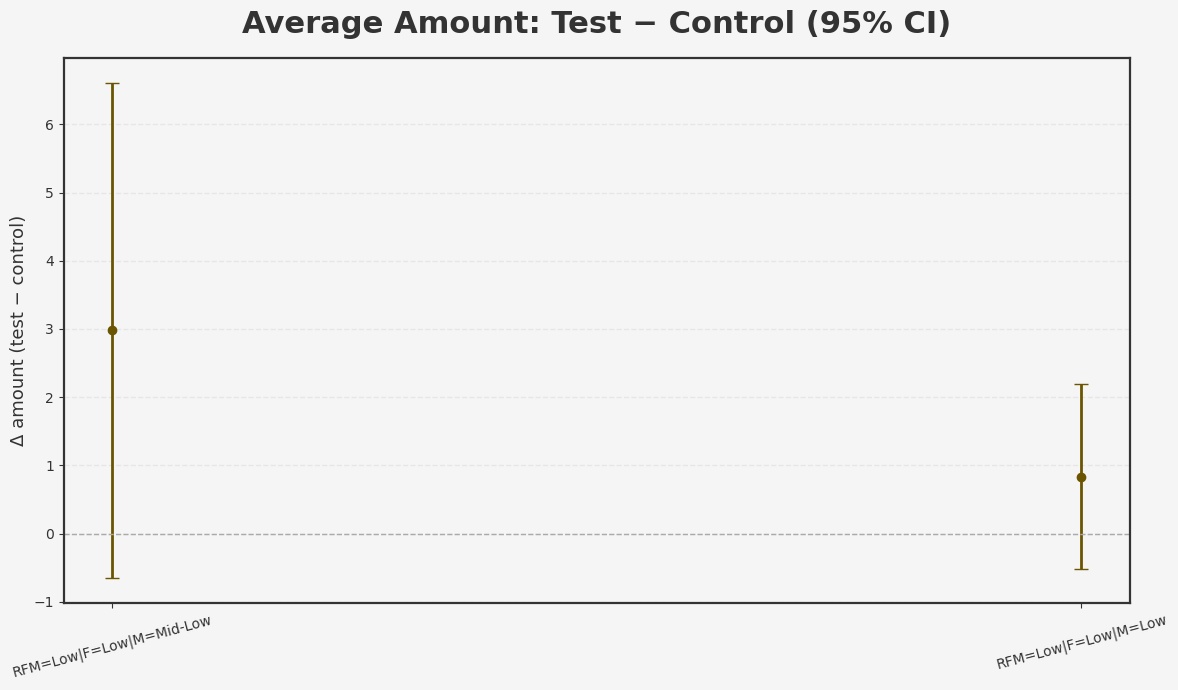

Saved -> outputs\figs\amt_diff_ci.png
Saved -> outputs\figs\ab_diffs_with_ci.csv


In [47]:
# === A/B fark görselleri (95% CI) — DÜZELTİLMİŞ TEK HÜCRE ======================
# TR: Segment bazında Test−Control farklarını ve %95 CI'ları hesaplar, 3 grafik üretir.
# EN: Per-segment Test−Control differences with 95% CIs; produces 3 plots.
# ------------------------------------------------------------------------------
# Giriş / Inputs:
#   post[CLIENTNUM, tgt_reason, ab_group, out_tx14, out_amt14, out_churn]
#   (opsiyonel) dec[tgt_reason, go] -> varsa sadece GO segmentler çizilir
#   (opsiyonel) COLS (renk paleti dict) ve ax_style(ax) (stil fonksiyonu)
# Çıktı / Outputs:
#   ./outputs/figs/churn_diff_ci.png
#   ./outputs/figs/tx_diff_ci.png
#   ./outputs/figs/amt_diff_ci.png
#   ./outputs/figs/ab_diffs_with_ci.csv

import math

# --- Guards -------------------------------------------------------------------
need_cols = {"CLIENTNUM","tgt_reason","ab_group","out_tx14","out_amt14","out_churn"}
if 'post' not in globals() or not need_cols.issubset(set(post.columns)):
    raise RuntimeError("`post` DataFrame is required with columns: "
                       "{CLIENTNUM,tgt_reason,ab_group,out_tx14,out_amt14,out_churn}")

FIG_DIR = Path("./outputs/figs"); FIG_DIR.mkdir(parents=True, exist_ok=True)

# --- Helpers (TR/EN) ----------------------------------------------------------
def norm_cdf(z: float) -> float:
    """TR: Standart normal CDF; EN: Standard normal CDF"""
    return 0.5 * (1.0 + math.erf(z / math.sqrt(2.0)))

def two_prop_stats(t: pd.Series, c: pd.Series):
    """
    TR: İki oran (test vs control) için fark (pp), %95 CI (unpooled) ve p-değeri (pooled z).
    EN: Two-proportion diff (pp), 95% CI (unpooled) and p-value (pooled z).
    Returns: diff_pp, (lo_pp, hi_pp), p
    """
    x1, n1 = int(t.sum()), int(t.shape[0])
    x0, n0 = int(c.sum()), int(c.shape[0])
    if n1 == 0 or n0 == 0:
        return float("nan"), (float("nan"), float("nan")), float("nan")
    p1, p0 = x1/n1, x0/n0
    diff = p1 - p0
    # unpooled CI (95%)
    se_un = math.sqrt(p1*(1-p1)/n1 + p0*(1-p0)/n0)
    lo, hi = (diff - 1.96*se_un)*100, (diff + 1.96*se_un)*100
    # pooled z-test p-value
    p_pool = (x1 + x0) / (n1 + n0)
    se_p = math.sqrt(p_pool*(1-p_pool)*(1/n1 + 1/n0))
    z = diff / (se_p + 1e-12)
    p = 2 * (1 - norm_cdf(abs(z)))
    return diff*100, (lo, hi), p

def mean_diff_stats(a_test: pd.Series, a_ctrl: pd.Series):
    """
    TR: Ortalama farkı için %95 CI (Welch approx) ve p-değeri.
    EN: Mean difference 95% CI (Welch approx) & p-value.
    Returns: diff, (lo, hi), p
    """
    a_test = a_test.astype(float); a_ctrl = a_ctrl.astype(float)
    n1, n0 = len(a_test), len(a_ctrl)
    if n1 == 0 or n0 == 0:
        return float("nan"), (float("nan"), float("nan")), float("nan")
    m1, m0 = a_test.mean(), a_ctrl.mean()
    v1, v0 = a_test.var(ddof=1), a_ctrl.var(ddof=1)
    se = math.sqrt(v1/max(1,n1) + v0/max(1,n0))
    diff = m1 - m0
    lo, hi = diff - 1.96*se, diff + 1.96*se
    z = diff / (se + 1e-12)
    p = 2 * (1 - norm_cdf(abs(z)))
    return float(diff), (float(lo), float(hi)), float(p)

def ab_diff_table(post_df: pd.DataFrame) -> pd.DataFrame:
    """
    TR: Her segment için tx_rate, churn ve amount fark tablosu (Test-Control) üretir.
    EN: Build per-segment diff table for tx_rate, churn and amount (Test-Control).
    """
    rows = []
    for seg, g in post_df.groupby("tgt_reason", observed=False):
        t = g[g["ab_group"]=="test"]
        c = g[g["ab_group"]=="control"]
        # tx_rate
        tx_diff, (tx_lo, tx_hi), p_tx = two_prop_stats(t["out_tx14"], c["out_tx14"])
        # churn
        ch_diff, (ch_lo, ch_hi), p_ch = two_prop_stats(t["out_churn"], c["out_churn"])
        # amount (mean)
        am_diff, (am_lo, am_hi), p_am = mean_diff_stats(t["out_amt14"], c["out_amt14"])
        rows.append({
            "tgt_reason": seg,
            "n_test": len(t), "n_control": len(c),
            "tx_rate_diff_pp": tx_diff, "tx_lo": tx_lo, "tx_hi": tx_hi, "tx_p": p_tx,
            "churn_diff_pp": ch_diff,  "ch_lo": ch_lo, "ch_hi": ch_hi, "ch_p": p_ch,
            "amt_diff": am_diff,       "amt_lo": am_lo, "amt_hi": am_hi, "amt_p": p_am
        })
    return pd.DataFrame(rows)

def plot_ci(dfin: pd.DataFrame, metric: str, lo_col: str, hi_col: str,
            title: str, ylabel: str, fname: str, color_key: str = "p2"):
    """
    TR: Fark + %95 CI hata çubuklu grafik çizer ve kaydeder.
    EN: Plot difference with 95% CI error bars and save to file.
    """
    # Sort: churn (negatif iyi) -> en negatif üstte, diğerleri azalan
    if metric == "churn_diff_pp":
        dfp = dfin.sort_values(metric)  # ascending (most negative = best)
    else:
        dfp = dfin.sort_values(metric, ascending=False)

    y = dfp["tgt_reason"]
    x = dfp[metric]
    # yerr parçalama: hedef merkezinden aşağı/ yukarı mesafeler
    lo = x - dfp[lo_col]
    hi = dfp[hi_col] - x

    fig, ax = plt.subplots()
    color = None
    if 'COLS' in globals() and isinstance(COLS, dict) and color_key in COLS:
        color = COLS[color_key]
    ax.errorbar(y, x, yerr=[lo, hi], fmt="o", linewidth=2, capsize=5, color=color)
    ax.axhline(0, linestyle="--", linewidth=1, color="#aaaaaa")
    if 'COLS' in globals() and isinstance(COLS, dict) and "text" in COLS:
        ax.set_title(title, color=COLS["text"])
    else:
        ax.set_title(title)
    ax.set_ylabel(ylabel); ax.set_xlabel("")
    if 'ax_style' in globals():
        ax_style(ax)
    plt.xticks(rotation=15)
    plt.tight_layout()
    out_fp = FIG_DIR / fname
    plt.savefig(out_fp, dpi=140, bbox_inches="tight")
    plt.show()
    print("Saved ->", out_fp)

# --- Build diffs (GO filtresi varsa uygula) 
if 'dec' in globals() and "go" in dec.columns:
    seg_whitelist = dec.loc[dec["go"]==True, "tgt_reason"].dropna().unique().tolist()
    use_post = post[post["tgt_reason"].isin(seg_whitelist)] if seg_whitelist else post
else:
    use_post = post

diffs = ab_diff_table(use_post)

# --- Grafikleri çiz & kaydet ---------------------------------------------------
# 1) Churn diff (pp)
plot_ci(diffs, "churn_diff_pp", "ch_lo", "ch_hi",
        "Churn: Test − Control (pp) with 95% CI",
        "pp (negatif daha iyi / negative is better)",
        "churn_diff_ci.png", color_key="p2")

# 2) Tx rate diff (pp)
plot_ci(diffs, "tx_rate_diff_pp", "tx_lo", "tx_hi",
        "Tx Rate: Test − Control (pp) with 95% CI",
        "pp (pozitif daha iyi / positive is better)",
        "tx_diff_ci.png", color_key="p1")

# 3) Average amount diff (currency)
plot_ci(diffs, "amt_diff", "amt_lo", "amt_hi",
        "Average Amount: Test − Control (95% CI)",
        "Δ amount (test − control)",
        "amt_diff_ci.png", color_key="p3")

# --- CSV çıktısı 
out_csv = FIG_DIR / "ab_diffs_with_ci.csv"
diffs.round(3).to_csv(out_csv, index=False)
print("Saved ->", out_csv)


Plotting segments: ['RFM=Low|F=Low|M=Mid-Low', 'RFM=Low|F=Low|M=Low']


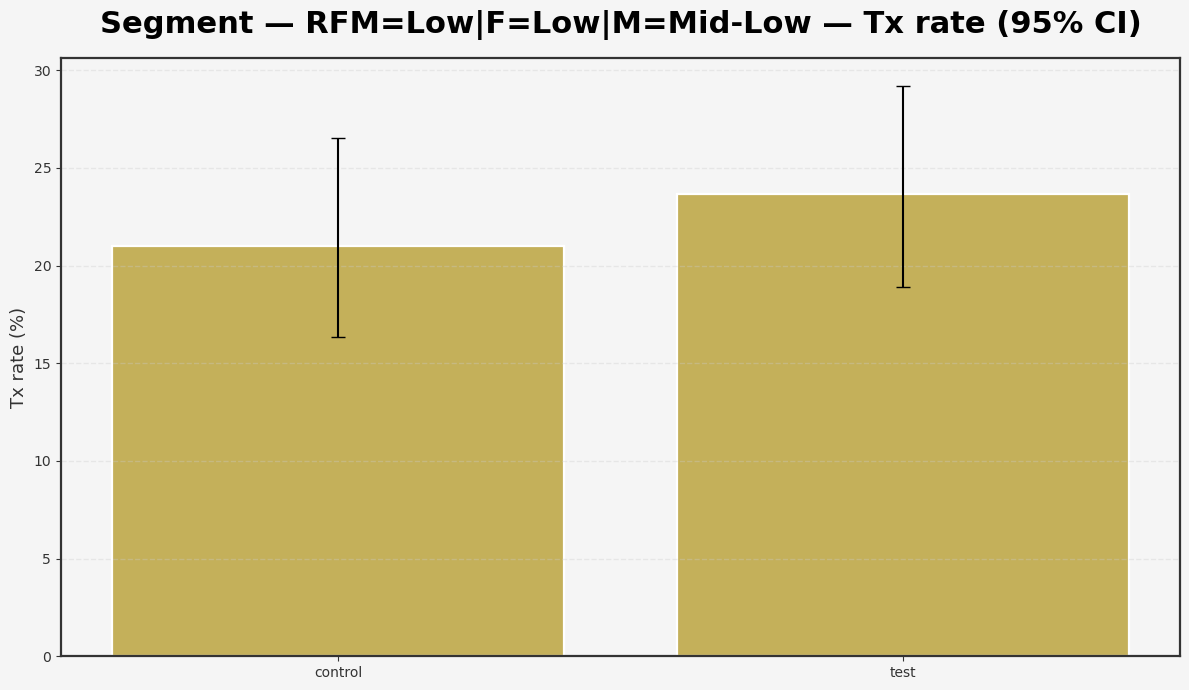

Saved -> outputs\figs\seg_RFM_Low_F_Low_M_Mid_Low_txrate.png


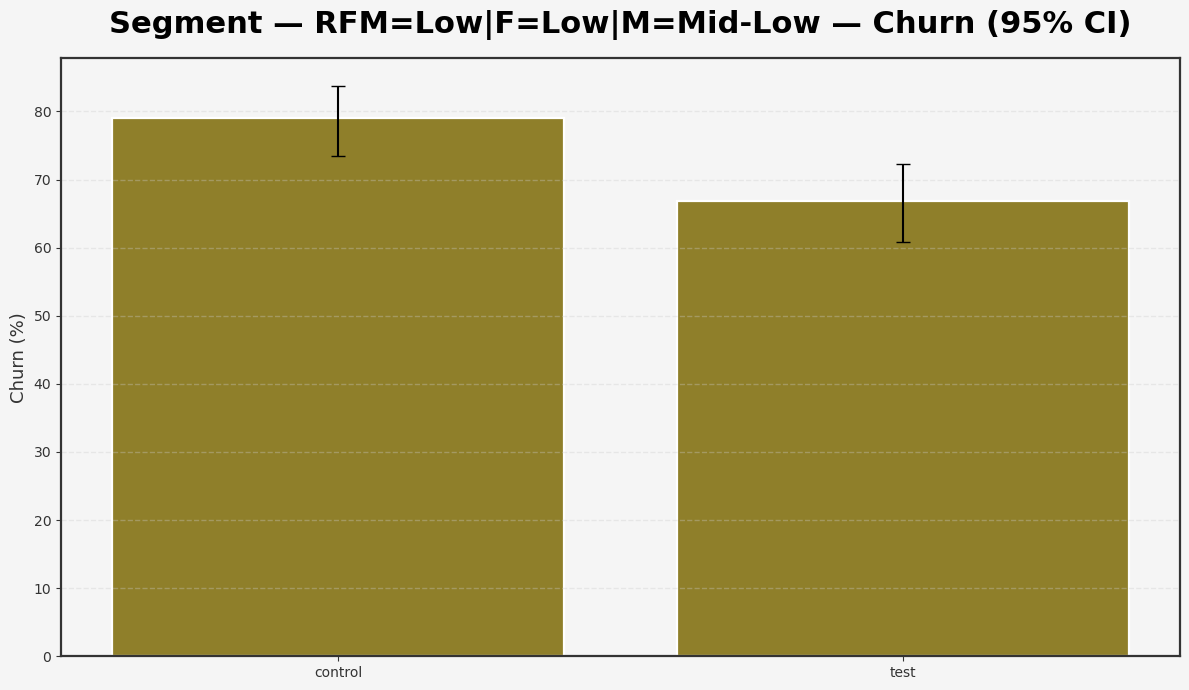

Saved -> outputs\figs\seg_RFM_Low_F_Low_M_Mid_Low_churn.png


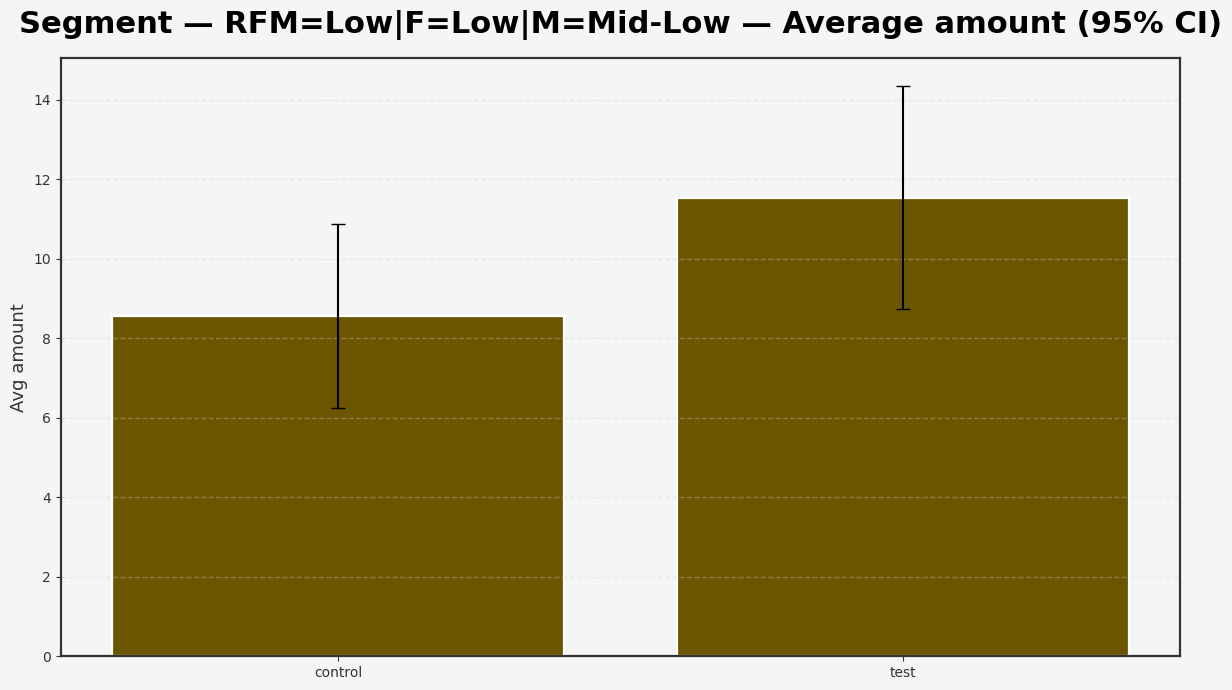

Saved -> outputs\figs\seg_RFM_Low_F_Low_M_Mid_Low_amount.png
Saved summary -> outputs\figs\seg_RFM_Low_F_Low_M_Mid_Low_summary.csv


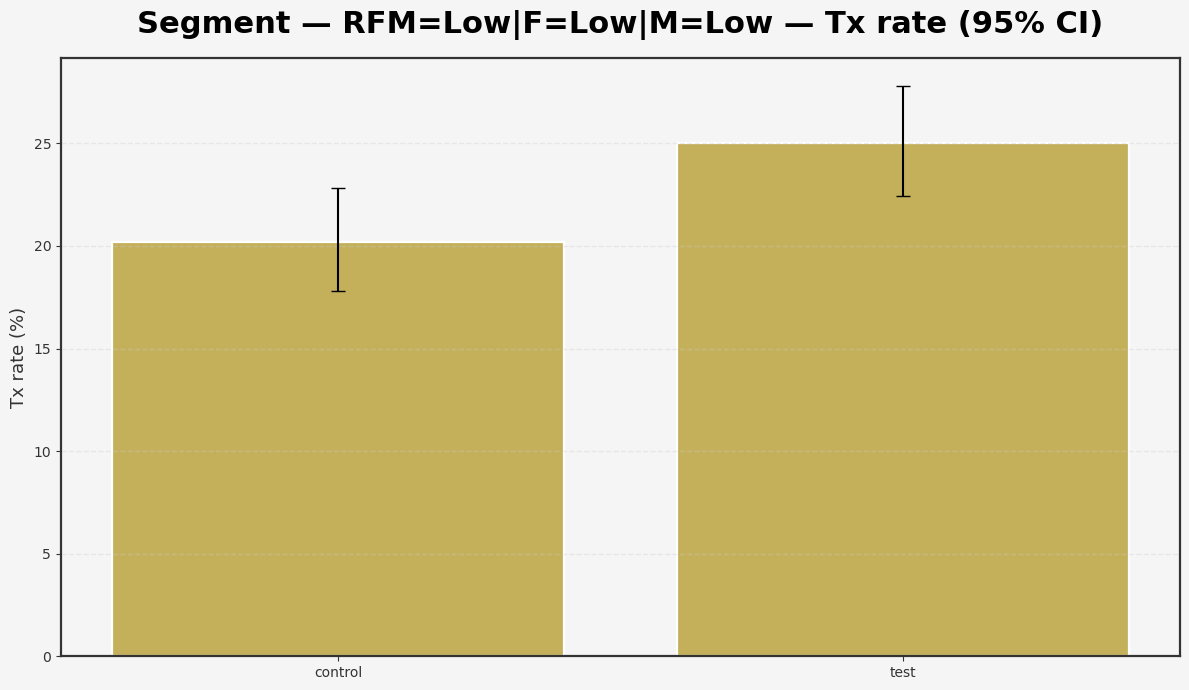

Saved -> outputs\figs\seg_RFM_Low_F_Low_M_Low_txrate.png


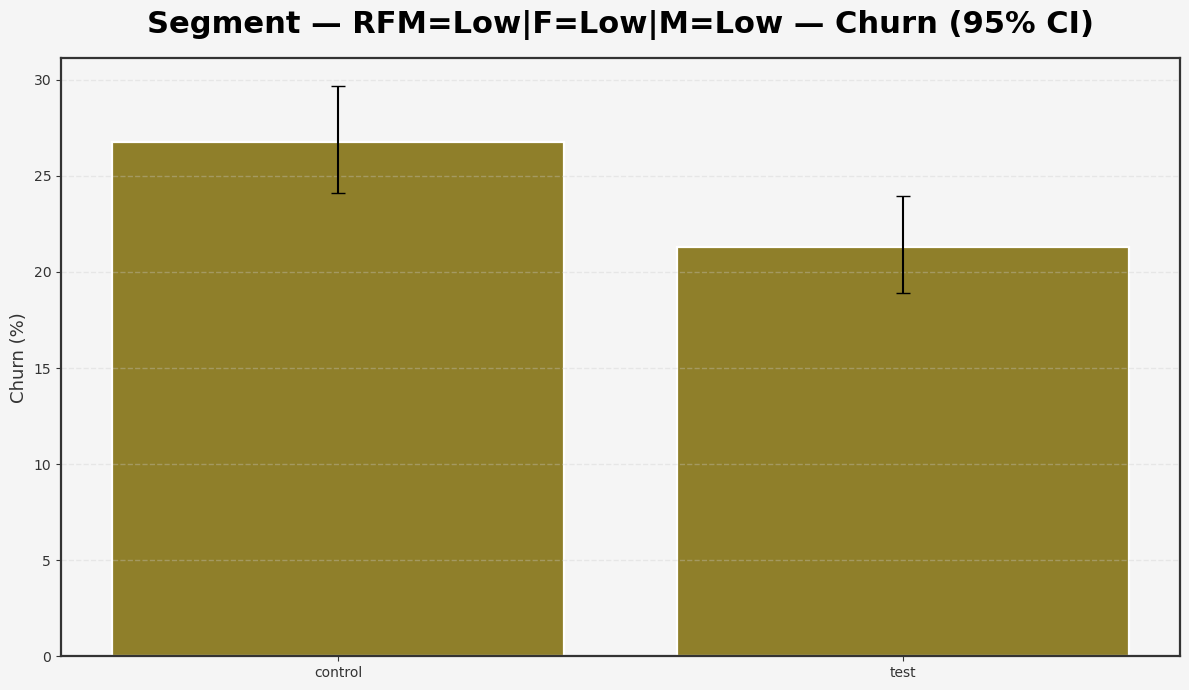

Saved -> outputs\figs\seg_RFM_Low_F_Low_M_Low_churn.png


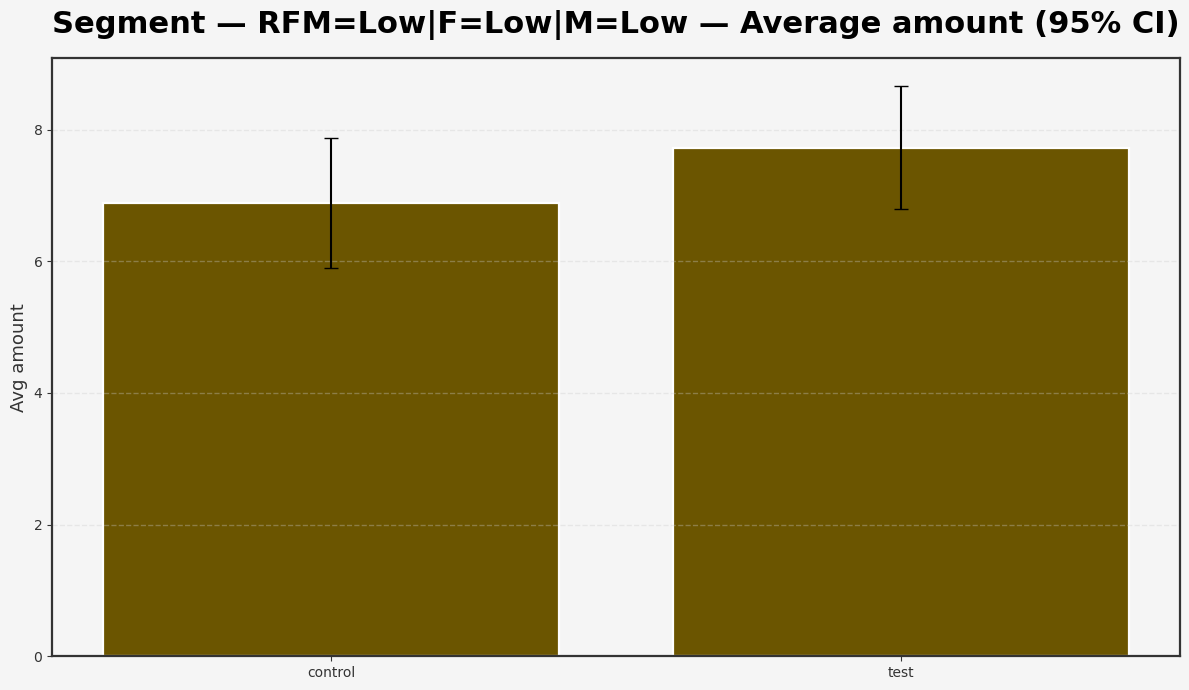

Saved -> outputs\figs\seg_RFM_Low_F_Low_M_Low_amount.png
Saved summary -> outputs\figs\seg_RFM_Low_F_Low_M_Low_summary.csv


In [48]:
# === Per-Segment: Test vs Control side-by-side charts (with 95% CI) ===========
# TR: Her segment için Test ve Control değerlerini yan yana ve %95 CI ile çizer.
# EN: For each segment, plots side-by-side Test vs Control with 95% CI.
# ------------------------------------------------------------------------------
# Inputs:
#   post[CLIENTNUM, tgt_reason, ab_group, out_tx14, out_amt14, out_churn]
#   (optional) dec[tgt_reason, go] -> if present, only GO segments are plotted
#   (optional) COLS palette dict and ax_style(ax) for consistent styling
# Outputs (per segment):
#   ./outputs/figs/seg_<slug>_txrate.png
#   ./outputs/figs/seg_<slug>_churn.png
#   ./outputs/figs/seg_<slug>_amount.png
# Also writes a per-segment summary CSV:
#   ./outputs/figs/seg_<slug>_summary.csv

import re

# --- Guards -------------------------------------------------------------------
need = {"CLIENTNUM","tgt_reason","ab_group","out_tx14","out_amt14","out_churn"}
if 'post' not in globals() or not need.issubset(set(post.columns)):
    raise RuntimeError("`post` is required with columns: "
                       "{CLIENTNUM,tgt_reason,ab_group,out_tx14,out_amt14,out_churn}")

FIG_DIR = Path("./outputs/figs"); FIG_DIR.mkdir(parents=True, exist_ok=True)

# --- Config -------------------------------------------------------------------
INCLUDE_ZERO_AMOUNTS = True  # TR: True -> sıfırlar dahil; False -> yalnızca işlem yapanlar
TITLE_PREFIX = "Segment — "  # başlık ön eki

# --- Helpers ------------------------------------------------------------------
def slugify(s: str) -> str:
    return re.sub(r"[^a-zA-Z0-9]+","_", s).strip("_")

def norm_cdf(z: float) -> float:
    return 0.5 * (1.0 + math.erf(z / math.sqrt(2.0)))

def wilson_ci(k: int, n: int, z: float = 1.96):
    """TR: Wilson %95 CI (oran). EN: Wilson 95% CI for proportions."""
    if n == 0:
        return (np.nan, np.nan, np.nan)
    p = k / n
    denom = 1 + z**2/n
    centre = (p + z**2/(2*n)) / denom
    margin = (z * math.sqrt((p*(1-p) + z**2/(4*n)) / n)) / denom
    lo, hi = centre - margin, centre + margin
    return p, lo, hi  # proportions (0-1)

def mean_ci_welch(a: np.ndarray, z: float = 1.96):
    """TR: Ortalama için yaklaşık %95 CI (Welch). EN: 95% CI for mean (Welch approx)."""
    a = np.asarray(a, dtype=float)
    n = len(a)
    if n == 0: return (np.nan, np.nan, np.nan)
    m = float(np.mean(a))
    v = float(np.var(a, ddof=1)) if n > 1 else 0.0
    se = math.sqrt(v / max(1, n))
    return m, m - z*se, m + z*se

def pick_color(key: str, fallback=None):
    if 'COLS' in globals() and isinstance(COLS, dict) and key in COLS:
        return COLS[key]
    return fallback

def style_ax(ax):
    if 'ax_style' in globals():
        ax_style(ax)

def bars_with_ci(ax, labels, heights, ci_lows, ci_highs, color=None, ylabel="", title=""):
    x = np.arange(len(labels))
    yerr = [np.array(heights) - np.array(ci_lows), np.array(ci_highs) - np.array(heights)]
    ax.bar(x, heights, yerr=yerr, capsize=5, edgecolor="white", linewidth=1.6, color=color)
    ax.set_xticks(x); ax.set_xticklabels(labels)
    ax.set_ylabel(ylabel); ax.set_title(title)
    ax.axhline(0, linestyle="--", linewidth=1, color="#aaaaaa")
    style_ax(ax)

def segment_summary(seg_df: pd.DataFrame) -> pd.DataFrame:
    """Return a small summary table for the segment (test/control)."""
    rows = []
    for arm, g in seg_df.groupby("ab_group", observed=False):
        n = len(g)
        # tx rate
        p_tx, lo_tx, hi_tx = wilson_ci(int(g["out_tx14"].sum()), n)
        # churn
        p_ch, lo_ch, hi_ch = wilson_ci(int(g["out_churn"].sum()), n)
        # amount
        arr = g["out_amt14"].to_numpy()
        if not INCLUDE_ZERO_AMOUNTS:
            arr = arr[arr > 0]
        m_am, lo_am, hi_am = mean_ci_welch(arr)
        rows.append({
            "ab_group": arm, "n": n,
            "tx_rate_%": round(p_tx*100,2), "tx_ci95": f"[{lo_tx*100:.2f},{hi_tx*100:.2f}]",
            "churn_%": round(p_ch*100,2),   "churn_ci95": f"[{lo_ch*100:.2f},{hi_ch*100:.2f}]",
            "amt_avg": round(m_am,2),       "amt_ci95": f"[{lo_am:.2f},{hi_am:.2f}]",
        })
    return pd.DataFrame(rows)

# --- Segment list --------------------------------------------------------------
if 'dec' in globals() and "go" in dec.columns:
    segments = dec.loc[dec["go"]==True, "tgt_reason"].dropna().unique().tolist()
    if not segments:
        segments = sorted(post["tgt_reason"].dropna().unique().tolist())
else:
    segments = sorted(post["tgt_reason"].dropna().unique().tolist())

print(f"Plotting segments: {segments}")

# --- Main loop: per-segment plots ---------------------------------------------
for seg in segments:
    seg_df = post[post["tgt_reason"]==seg].copy()
    if seg_df.empty:
        print(f"Skip (no data): {seg}")
        continue

    slug = slugify(seg)
    title_prefix = TITLE_PREFIX + seg

    # ---------- TX RATE (pp) ----------
    fig, ax = plt.subplots()
    tx_rows = []
    for arm, g in seg_df.groupby("ab_group", observed=False):
        p, lo, hi = wilson_ci(int(g["out_tx14"].sum()), len(g))
        tx_rows.append((arm, p*100, lo*100, hi*100))
    tx_rows = sorted(tx_rows, key=lambda x: x[0])  # control, test
    labels = [r[0] for r in tx_rows]
    heights = [r[1] for r in tx_rows]
    lows    = [r[2] for r in tx_rows]
    highs   = [r[3] for r in tx_rows]
    bars_with_ci(ax, labels, heights, lows, highs,
                 color=pick_color("p1"),
                 ylabel="Tx rate (%)",
                 title=f"{title_prefix} — Tx rate (95% CI)")
    plt.tight_layout()
    fp = FIG_DIR / f"seg_{slug}_txrate.png"; plt.savefig(fp, dpi=140, bbox_inches="tight"); plt.show()
    print("Saved ->", fp)

    # ---------- CHURN (pp) ----------
    fig, ax = plt.subplots()
    ch_rows = []
    for arm, g in seg_df.groupby("ab_group", observed=False):
        p, lo, hi = wilson_ci(int(g["out_churn"].sum()), len(g))
        ch_rows.append((arm, p*100, lo*100, hi*100))
    ch_rows = sorted(ch_rows, key=lambda x: x[0])
    labels = [r[0] for r in ch_rows]
    heights = [r[1] for r in ch_rows]
    lows    = [r[2] for r in ch_rows]
    highs   = [r[3] for r in ch_rows]
    bars_with_ci(ax, labels, heights, lows, highs,
                 color=pick_color("p2"),
                 ylabel="Churn (%)",
                 title=f"{title_prefix} — Churn (95% CI)")
    plt.tight_layout()
    fp = FIG_DIR / f"seg_{slug}_churn.png"; plt.savefig(fp, dpi=140, bbox_inches="tight"); plt.show()
    print("Saved ->", fp)

    # ---------- AMOUNT (mean + 95% CI) ----------
    fig, ax = plt.subplots()
    amt_rows = []
    for arm, g in seg_df.groupby("ab_group", observed=False):
        arr = g["out_amt14"].to_numpy()
        if not INCLUDE_ZERO_AMOUNTS:
            arr = arr[arr > 0]
        m, lo, hi = mean_ci_welch(arr)
        amt_rows.append((arm, m, lo, hi))
    amt_rows = sorted(amt_rows, key=lambda x: x[0])
    labels = [r[0] for r in amt_rows]
    heights = [r[1] for r in amt_rows]
    lows    = [r[2] for r in amt_rows]
    highs   = [r[3] for r in amt_rows]
    bars_with_ci(ax, labels, heights, lows, highs,
                 color=pick_color("p3"),
                 ylabel="Avg amount",
                 title=f"{title_prefix} — Average amount (95% CI)")
    plt.tight_layout()
    fp = FIG_DIR / f"seg_{slug}_amount.png"; plt.savefig(fp, dpi=140, bbox_inches="tight"); plt.show()
    print("Saved ->", fp)

    # ---------- Segment summary CSV ----------
    summ = segment_summary(seg_df)
    summ_fp = FIG_DIR / f"seg_{slug}_summary.csv"
    summ.to_csv(summ_fp, index=False)
    print("Saved summary ->", summ_fp)
